In [1]:
#importing required libraries
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#changing and verifying directory
os.chdir(r"D:\edWisor Qs\P2. Santander")
os.getcwd()

'D:\\edWisor Qs\\P2. Santander'

In [3]:
#importing train and test to environment
train = pd.read_csv("train.csv", sep = ",", encoding = "ISO-8859-1")
test = pd.read_csv("test.csv", sep = ",", encoding = "ISO-8859-1")

In [4]:
#checking dimensions
print(train.shape)
print(test.shape)

(200000, 202)
(200000, 201)


In [5]:
#checking first 5 columns
print(train.head())
print(test.head())

   ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0

We see that the **train** dataset is made up of **ID_code**, **target** and 200 features, from **var_0** to **var_199**. And the **test** dataset is made up of **ID_code**, and 200 features, from **var_0** to **var_199**.

These 200 variables are different characteristics for all the customers.

## Exploratory Data Analysis

Let us start the EDA by first dropping the **ID_code** column from both train and test as these are just the serial numbers and do not contribute anything to the classification process. 

In [6]:
#dropping id_code from train and test
train = train.drop(["ID_code"], axis = 1)
test = test.drop(["ID_code"], axis = 1)

In [7]:
#checking new shape
print(train.shape)
print(test.shape)

(200000, 201)
(200000, 200)


Next, let us check the data types for all the variables, search for NULL values in the columns, and look at the unique values in all columns.

In [8]:
#checking dtypes
print(train.dtypes)
print(test.dtypes)

target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 201, dtype: object
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 200, dtype: object


In [9]:
#search for missing values
count_train = 0
for i in train.isnull().sum().values:
    if i != 0:
        count_train += 1
print(count_train)

count_test = 0
for i in test.isnull().sum().values:
    if i != 0:
        count_test += 1
print(count_test)

0
0


Therefore, we see that both train and test do not have any missing values in them. So there is need to perform **Missing Value Analysis** for these datasets.

In [10]:
#checking unique values
for i in train:
    print(train[i].value_counts())
    
for i in test:
    print(test[i].value_counts())

0    179902
1     20098
Name: target, dtype: int64
10.6829    11
13.0656    11
8.6649     11
11.9590    10
11.2916    10
           ..
9.1061      1
12.9487     1
17.7412     1
17.3435     1
15.1413     1
Name: var_0, Length: 94672, dtype: int64
-2.4313    10
-1.1853    10
-2.1515    10
-2.5753    10
-0.3668     9
           ..
-5.6401     1
-7.5629     1
-7.4830     1
-7.4994     1
-5.3182     1
Name: var_1, Length: 108932, dtype: int64
9.1497     12
10.7345    11
8.3741     11
11.6680    11
12.3873    11
           ..
7.1781      1
10.3606     1
5.7669      1
5.3875      1
18.1443     1
Name: var_2, Length: 86555, dtype: int64
6.8029     15
6.0463     13
6.7984     13
7.5891     12
7.6744     12
           ..
10.0357     1
4.1889      1
2.7292      1
10.3938     1
11.1116     1
Name: var_3, Length: 74597, dtype: int64
10.8911    15
11.3742    14
10.9037    14
11.0683    14
10.2042    13
           ..
8.0430      1
12.4229     1
12.4227     1
14.0874     1
13.7348     1
Name: var_4, L

We see that while the **target_ID** has unique values for all observations, the performance for **var_0**, **var_1**, **var_2**,... **var_199** is more like a mixed bag. While some variables have all unique values, others have some repeating values in them.

## Target Class Imbalance Problem

The check for unique values in the previous snippet yielded some very interesting observations. The **target** variable, which represents whether a customer purchased a service or not (0 for No and 1 for Yes), shows a huge imbalance in favor of 0 or No. Let me replace the 0 with No and the 1 with Yes to make it easier to read the results.

In [11]:
#replacing values
train["target"] = train["target"].replace(0, "No")
train["target"] = train["target"].replace(1, "Yes")

print(train["target"].dtype)
print(train["target"].value_counts())

object
No     179902
Yes     20098
Name: target, dtype: int64


Graphically speaking, the imbalance would look like this.

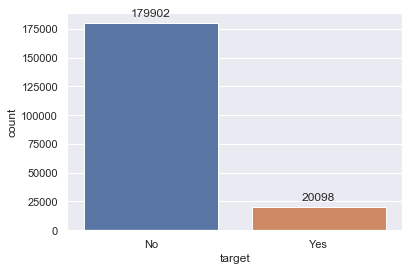

In [12]:
#plotting distribution of target
sns.set()
ax = sns.countplot(x=train["target"], y=None, hue=None, data=train)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [13]:
#percentage wise distribution
count_Yes = 0
count_No = 0
for i in train["target"]:
        if i == "No":
            count_No += 1
        else:
            count_Yes += 1

print("Percentage of NO = ", count_No/len(train) * 100, "%")
print("Percentage of YES = ", count_Yes/len(train) * 100, "%")

Percentage of NO =  89.95100000000001 %
Percentage of YES =  10.049 %


This shows us that the target class is hugely imbalanced and this will lead to problems while applying the model on the test data. This is because while training the model on the train data, it will be hugely biased towards the majority **No** class, and will only consider the 10% minority **Yes** class as noise and disregard it. Therefore the model will not be able to correctly predict for future test cases as it will more or less classify everything as **Yes**.

In order to fix this, **SMOTE (Synthetic Minority Oversampling Technique)** will be done on the training dataset and this modified trained dataset will be carried forward with the preprocessing and the model application. This then will be validated on the test data. (NOTE: Random Undersampling will not be done as it leads to massive loss of data. Random Oversampling will not be done either as this leads to overfitting as a lot of duplicate instances of the minority class is created.)

In [14]:
#using SMOTE to resample the data
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label 'No':", count_No)
print("Before OverSampling, counts of label 'Yes':", count_Yes)
print("\n")

sm = SMOTE(random_state = 2)
# print(sm)
train_smoted, traintarget_smoted = sm.fit_sample(train.iloc[:, 1:], train.iloc[:, 0].ravel())
  
print('After OverSampling, the shape of train: ', train_smoted.shape)
print('After OverSampling, the shape of traintarget: ', traintarget_smoted.shape) 
print("\n")
  
print("After OverSampling, counts of label 'No': ", (sum(traintarget_smoted == "No"))) 
print("After OverSampling, counts of label 'Yes': ", (sum(traintarget_smoted == "Yes"))) 


Using TensorFlow backend.


Before OverSampling, counts of label 'No': 179902
Before OverSampling, counts of label 'Yes': 20098


After OverSampling, the shape of train:  (359804, 200)
After OverSampling, the shape of traintarget:  (359804,)


After OverSampling, counts of label 'No':  179902
After OverSampling, counts of label 'Yes':  179902


Thus after **SMOTE**, we get 179902 observations for "No" and an equal  number of observations for "Yes".

Now we need to combine *train_smoted* (containing all the train observations without the label) and *traintarget_smoted* (containing all the labels for the train observations) to get the new train dataset, but before that we need to convert these two numpy ndarrays to dataframes.

In [34]:
#storing indices of OG train in list
train_cols = train.columns[1:]
print(train_cols)
train_target_cols = []
train_target_cols.append(train.columns[0])
print(train_target_cols)
# print(type(train_target_cols))

#converting both arrays to dataframes
train_smoted_df = pd.DataFrame(train_smoted, columns = train_cols)
print(train_smoted_df.head())
traintarget_smoted_df = pd.DataFrame(traintarget_smoted, columns = train_target_cols)
print(traintarget_smoted_df.head())

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)
['target']
<class 'list'>
     var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7   var_8  \
0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266 -4.9200   
1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338  3.1468   
2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155 -4.9193   
3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250 -5.8609   
4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514  6.2654   

    var_9  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  8.0851  ...   7.6421   7.7214   2.5837  10.9516 

In [37]:
#combining both dataframes to get new train
new_train = pd.concat([traintarget_smoted_df, train_smoted_df], axis = 1)

In [38]:
#checking dimension and head of new_train
print(new_train.shape)
print(new_train.head())

(359804, 201)
  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0     No   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1     No  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2     No   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3     No  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4     No   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_19

In [39]:
#saving new train to disk
new_train.to_csv("new train.csv", header = True, index = False)

In [179]:
new_train = pd.read_csv("new train.csv", sep = ",", encoding = "ISO-8859-1")

## VISUALIZING THE DATA

Now that the imbalance problem has been solved, let us take a look at the distributions for all the variables in the new_train dataset in the form of histograms.

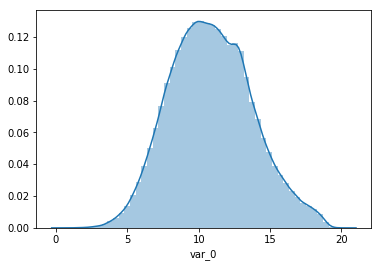

In [180]:
sns.distplot(new_train["var_0"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021121ABA898>,
      dtype=object)

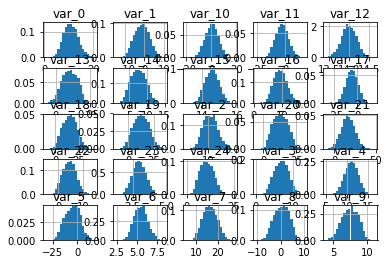

In [181]:
#distribution of var_0 to var_24 in new_train
subs = new_train.iloc[:, 1:26]
subs.shape
subs.hist(normed = True, bins = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021102620BA8>,
      dtype=object)

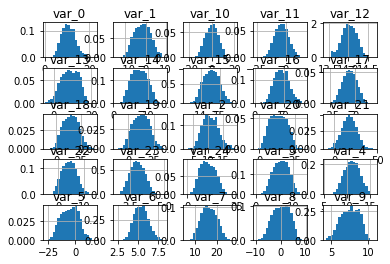

In [77]:
#distribution of var_0 to var_24 in test
subs = test.iloc[:, 0:25]
subs.shape
subs.hist(normed = True, bins = 20)

Taking a look at the first 25 variables for both train and test dataset, we can get a general idea of all 200 variables, and we can come to the conclusion that all 200 of them are normally distributed within themselves.

## Outlier Analysis

Now that a general idea has been obtained about the independent variables, let us observe the presence of outliers in the data. This is a very important step in data preprocessing as outliers can greatly bias the data towards one particular variable, and thus affect the model outcome.

We will work with the **new_train** variable first. A function is created that displays the boxplot for any variable passed to it. It can be used to check the boxplots for any variable.

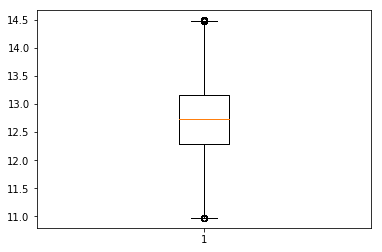

In [259]:
#function to check outlier
def outl(var_name):
    %matplotlib inline
    plt.boxplot(new_train[var_name])
    plt.show()
    
#calling the function
outl("var_50")

Thus we see that each variable in the **new_train** dataset has some outliers.

The below code snippet calculates the **75th percentile** and **25th percentile** for each variable. It also calculates the **inter-quartile range** and the **minimum** and **maximum** values for each variable.

It then detects the outliers for each variable, which are basically values that fall beyond the minimum and the maximum values. After that it makes those particular cell values **NULL** as these need to be imputed with either the mean or the median.

*NOTE: It also creates a dictionary **dic** which stores each variable name as the key and the number of NaN values as their respective value.*

In [184]:
#loop to make outliers NaN
dic = {}
count = 0
c = 1
k = new_train.columns[1:]
# print(k)
for i in k:
    print(i)
    q75, q25 = np.percentile(new_train[i], [75, 25])
    print("q75 = ", q75, "q25 = ", q25)
    iqr = q75 - q25
    print("iqr = ",iqr)
    mini = q25 - (iqr * 1.5)
    maxi = q75 + (iqr * 1.5)
    print("minimum = ",mini, "maximum = ",maxi)
    for j in range(0, len(new_train)):
        if new_train.iloc[j, c] > maxi or new_train.iloc[j, c] < mini:
                   new_train.iloc[j, c] = np.nan
                   count += 1
    print("Count of", i, "=", count, "\n")
    dic[i] = count
    count = 0
    c += 1
print(dic)
    

var_0
q75 =  12.837506342616813 q25 =  8.795367473656343
iqr =  4.042138868960469
minimum =  2.732159170215639 maximum =  18.900714646057516
Count of var_0 = 483 

var_1
q75 =  1.3655201151854441 q25 =  -4.1849
iqr =  5.550420115185444
minimum =  -12.510530172778164 maximum =  9.691150287963609
Count of var_1 = 64 

var_2
q75 =  12.606417352009952 q25 =  9.03011959670091
iqr =  3.5762977553090423
minimum =  3.6656729637373466 maximum =  17.970863984973516
Count of var_2 = 288 

var_3
q75 =  8.194695124045746 q25 =  5.447695301657871
iqr =  2.746999822387875
minimum =  1.3271955680760579 maximum =  12.315194857627558
Count of var_3 = 244 

var_4
q75 =  12.1758 q25 =  10.024024535135602
iqr =  2.1517754648643983
minimum =  6.796361337839005 maximum =  15.403463197296599
Count of var_4 = 393 

var_5
q75 =  0.7823630759129657 q25 =  -10.385461897463596
iqr =  11.167824973376561
minimum =  -27.137199357528438 maximum =  17.534100535977807
Count of var_5 = 13 

var_6
q75 =  6.0522 q25 =  4.8

I will save this new_train dataset having NULL values in my disk.

In [189]:
#saving to disk
new_train.to_csv("after nanning.csv", header = True, index = False)

The next step is to impute these missing NULL values with either the mean or the median. In order to accomplish this, let us make one particular value NaN and check by imputing the median, and then the mean. Then the method which gives the better result will be considered.

In [230]:
#making a copy for reference
safe = new_train.copy()

In [231]:
#checking 13000th row of var_0
new_train["var_0"][13000]

11.375

In [232]:
#making it NaN
new_train["var_0"][13000] = np.nan

C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [233]:
#imputing with median
new_train["var_0"] = new_train["var_0"].fillna(new_train["var_0"].median())

In [234]:
#checking 13000th value now
new_train["var_0"][13000]

10.76290593997193

Now I will do the same thing with the mean.

In [235]:
#loading dataset from safe
new_train  = safe.copy()

In [236]:
#checking 13000th row of var_0
new_train["var_0"][13000]

11.375

In [237]:
#making it NaN
new_train["var_0"][13000] = np.nan

C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [238]:
#imputing with mean
new_train["var_0"] = new_train["var_0"].fillna(new_train["var_0"].mean())

In [239]:
#checking 13000th value now
new_train["var_0"][13000]

10.877683308243888

We see here that the original 13000th value was 11.375. After imputing with the median method, its new value was 10.763. However, the mean method gave us a new value of 10.878. So clearly, the mean method is the more accurate one. So we will freeze that method.

I will replace the 13000th value with its original value of 11.375.

In [241]:
#replacing 13000th value with original value
new_train["var_0"][13000] = 11.375

11.375

Next, I will run a loop to fill out all the columns with their respective means. As of now, only **var_0** was filled with its mean.

In [254]:
# #loop to fill NaN values for all columns
k = new_train.columns[2:]
for i in k:
    new_train[i] = new_train[i].fillna(new_train[i].mean())

#checking presence of NULL values now
print(new_train.isnull().sum())

Unnamed: 0    0
target        0
var_0         0
var_1         0
var_2         0
             ..
var_195       0
var_196       0
var_197       0
var_198       0
var_199       0
Length: 202, dtype: int64


In [257]:
new_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,No,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,No,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,No,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,No,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,No,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [243]:
#writing file to disk
new_train.to_csv("new_train_after_outlieranalysis.csv")

Now, we need to do the same operations for the test dataset. First a quick view of boxplots for the variables, then finding out the outliers and making them NaN, and then we impute them with their mean.

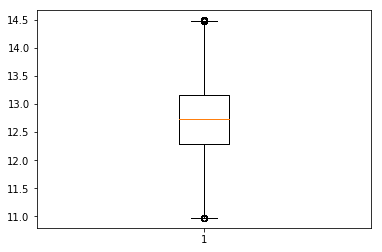

In [261]:
#function to check outlier
def outly(var_name):
    %matplotlib inline
    plt.boxplot(test[var_name])
    plt.show()
    
#calling the function
outl("var_50")

Judging by these plots, outliers are much less for variables in the test dataset. Let us check the number of outliers for each variable now, store them in a dictionary and make them NaN.

In [264]:
#loop to check count of outliers
dic = {}
count = 0
c = 0
k = test.columns
# print(k)
for i in k:
    print(i)
    q75, q25 = np.percentile(test[i], [75, 25])
    print("q75 = ", q75, "q25 = ", q25)
    iqr = q75 - q25
    print("iqr = ",iqr)
    mini = q25 - (iqr * 1.5)
    maxi = q75 + (iqr * 1.5)
    print("minimum = ",mini, "maximum = ",maxi)
    for j in range(0, len(test)):
        if test.iloc[j, c] > maxi or test.iloc[j, c] < mini:
            test.iloc[j, c] = np.nan
            count += 1
    print("Count of", i, "=", count, "\n")
    dic[i] = count
    count = 0
    c += 1
print(dic)

var_0
q75 =  12.7396 q25 =  8.442975
iqr =  4.296624999999999
minimum =  1.9980375000000024 maximum =  19.184537499999998
Count of var_0 = 122 

var_1
q75 =  1.3434 q25 =  -4.700125
iqr =  6.043525
minimum =  -13.7654125 maximum =  10.4086875
Count of var_1 = 4 

var_2
q75 =  12.495025 q25 =  8.7356
iqr =  3.7594250000000002
minimum =  3.0964624999999995 maximum =  18.134162500000002
Count of var_2 = 56 

var_3
q75 =  8.3276 q25 =  5.2305
iqr =  3.0971
minimum =  0.5848500000000003 maximum =  12.97325
Count of var_3 = 13 

var_4
q75 =  12.2534 q25 =  9.891074999999999
iqr =  2.3623250000000002
minimum =  6.347587499999999 maximum =  15.7968875
Count of var_4 = 89 

var_5
q75 =  0.942575 q25 =  -11.2014
iqr =  12.143975
minimum =  -29.4173625 maximum =  19.1585375
Count of var_5 = 0 

var_6
q75 =  6.0058 q25 =  4.7726
iqr =  1.2332
minimum =  2.9227999999999996 maximum =  7.8556
Count of var_6 = 115 

var_7
q75 =  19.09455 q25 =  13.9339
iqr =  5.160650000000002
minimum =  6.19292499999

Now that this is done, let us check the count of null values in each column in the test dataset.

In [266]:
#checking count of NULL values in test
test.isnull().sum()

var_0      122
var_1        4
var_2       56
var_3       13
var_4       89
          ... 
var_195    104
var_196      0
var_197     51
var_198    115
var_199     14
Length: 200, dtype: int64

In [268]:
#loop to fill NaN values for all columns
k = test.columns
for i in k:
    test[i] = test[i].fillna(test[i].mean())

#checking presence of NULL values now
print(new_train.isnull().sum())

target     0
var_0      0
var_1      0
var_2      0
var_3      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64


Thus, all NaN values for test have also been filled. Now, saving this dataframe to disk.

In [269]:
#writing file to disk
test.to_csv("test_after_outlieranalysis.csv", index = False, header = True)

## Feature Selection

Here we do **correlation analysis** amongst all the independent continuous variables and eliminate if two variables have very close correlation. 

We also do a **feature importance** test to find out the importance of each independent feature as it pertains to the dependent variable. We eliminate the features that are not so important.

### Correlation analysis

The correlation plot below was made using a function where the two row indices need to be passed and then the function would give out a heatmap showing the correlation. 

For example, if the indices 1 and 6 are passed to the function, the heatmap would have correlation for **var_0** (index = 1),  **var_1** (index = 2), **var_2** (index = 3), **var_3** (index = 4) and **var_4** (index = 5). So any chunk could be passed and the correlation could be seen. This was done because it is impossible to view a correlation plot for all 200 variables involved.

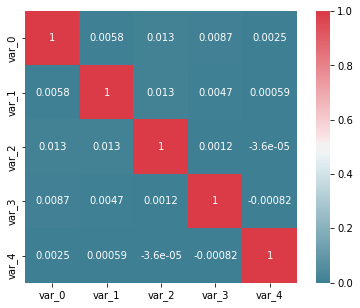

In [35]:
#function to build heatmap
def corr_plot(index1, index2):
    col = new_train.columns[index1 : index2]
    sub_col = new_train.loc[0:359804, col]
    
    ##building correlation plot
    #setting width and height of plot
    f, ax = plt.subplots(figsize = (7, 5))
    
    #generate the corr matrix
    corr = sub_col.corr()
    
    #putting corr into perspectivev via heatmap
    sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax, annot = True, cbar = True)

#calling
corr_plot(1, 6)

After multiple iterations where different chunks of the independent variables were passed, I came to the conclusion that all independent variables have very less correlation with each other. For example, the correlation plot for **var_0** (index = 1), **var_1** (index = 2), **var_2** (index = 3), **var_3** (index = 4) and **var_4** (index = 5) is given above and clearly, the correlation coefficients are very very low. So no two variables are similar to each other and thus all variables can be kept as of now.

### Feature Importance

The next step is to check for the importance of each independent variable in predicting the target class. **ExtraTreesClassifier** is used from the inbuilt feature importance class in Tree Based Classifiers.  This gives a score for each feature of the data, with the highest score being for the most important feature.

In [36]:
#splitting new_train into ndependent and dependent variables
X = new_train.iloc[:,1:201]  #independent columns
y = new_train.iloc[:,0]    #target column

In [37]:
#importing required function
from sklearn.ensemble import ExtraTreesClassifier

C:\Users\Saurav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.0064202  0.00649483 0.00573796 0.004797   0.00440169 0.00474614
 0.00850969 0.00459376 0.00517295 0.00924574 0.00407075 0.00499897
 0.00731076 0.00578676 0.00484174 0.0050364  0.00423436 0.00411576
 0.00500773 0.00397517 0.00468211 0.00527984 0.00631884 0.00483472
 0.00564131 0.00430646 0.00582406 0.00449249 0.00422419 0.0041028
 0.00418385 0.00547748 0.00592435 0.00618452 0.0058614  0.00456483
 0.00537405 0.0045181  0.00406567 0.00442352 0.00491306 0.00407935
 0.00451284 0.00564874 0.00505688 0.00405333 0.00412442 0.00413624
 0.00442086 0.00510615 0.00425524 0.0040477  0.00430798 0.00639361
 0.00426166 0.00452025 0.00510301 0.00441128 0.00413609 0.00486819
 0.00420226 0.00399155 0.00433774 0.00458091 0.00473614 0.0040961
 0.00431571 0.00498062 0.00443516 0.00410728 0.00429531 0.00571104
 0.00419615 0.00441106 0.00391586 0.00463441 0.00550528 0.00476604
 0.00634582 0.00475005 0.00512937 0.00789431 0.0046848  0.00412758
 0.00414154 0.00488145 0.00425618 0.00479309 0.00494929 0.005265

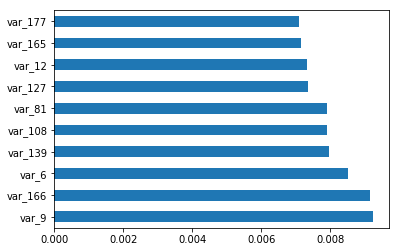

var_0      0.006420
var_1      0.006495
var_2      0.005738
var_3      0.004797
var_4      0.004402
             ...   
var_195    0.004782
var_196    0.005021
var_197    0.005252
var_198    0.006078
var_199    0.004434
Length: 200, dtype: float64


In [40]:
#building model
model = ExtraTreesClassifier()
model.fit(X,y)

#printing out the importance scores
print(model.feature_importances_)

#creating series for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

#plotting graph of feature importances for better visualization
feat_importances.nlargest(10).plot(kind='barh')   #top 10 features
plt.show()

#printing feat_importances to get another idea
print(feat_importances)

In [46]:
#checking stats of feat_importances
feat_importances.describe()

count    200.000000
mean       0.005000
std        0.000992
min        0.003795
25%        0.004295
50%        0.004741
75%        0.005326
max        0.009246
dtype: float64

We now have in our hands a plot of the 10 most important features and also a series **feat_importances** that has the importance scores of all variables involved.

Let us sort **feat_importances** in descending order.

In [45]:
#sorting
feat_imp_sorted = feat_importances.sort_values(ascending = False)
print(feat_imp_sorted)

var_9      0.009246
var_166    0.009164
var_6      0.008510
var_139    0.007958
var_108    0.007911
             ...   
var_120    0.003958
var_102    0.003950
var_74     0.003916
var_97     0.003812
var_117    0.003795
Length: 200, dtype: float64


In [54]:
#saving to disk
feat_imp_sorted.to_csv("sort.csv", header = True, index = True)

Since 200 variables is a lot for the model to analyze, I will make two choices here and will solve the rest of the way going forward in two different ways.

1. Top 60% variables (120 variables) will be taken moving forward and the rest will be dropped.
2. A threshold value of the mean will be taken and anything below the mean importance score will be dropped.

### Method 1: Taking top 60% variables based on performance scores

In [77]:
#method1 for new_train

#storing top 60% vars in k
k = feat_imp_sorted.index[0:120]
# print(k)

#making a subset from new_train out of only these 120 variables
new_train_1 = new_train.loc[:, k]
print(new_train_1.shape)
print(new_train_1.head())

# concatenating target column to new_train_1
new_train_1["target"] = new_train["target"]

print(new_train_1.shape)
print(new_train_1.head())

#writing this new_train_1 to disk
new_train_1.to_csv("new_train_1.csv", index = False, header = True)

Index(['var_9', 'var_166', 'var_6', 'var_139', 'var_108', 'var_81', 'var_127',
       'var_12', 'var_165', 'var_177',
       ...
       'var_156', 'var_75', 'var_114', 'var_185', 'var_144', 'var_7', 'var_63',
       'var_35', 'var_180', 'var_126'],
      dtype='object', length=120)
(359804, 120)
    var_9  var_166   var_6  var_139  var_108   var_81  var_127   var_12  \
0  5.7470   2.7004  5.1187  15.6599  14.1104  13.8372  -0.7338  14.0137   
1  8.0851   3.2003  5.6208  16.1622  13.9550  18.1782   2.4354  14.0239   
2  5.9525   3.2790  6.9427   8.6674  14.1963  15.7811  -2.5511  14.1929   
3  8.2450   2.5881  5.8428   8.9821  14.3256  10.5404  -1.3683  13.8463   
4  7.6784   3.2304  5.9405  13.9547  14.0837  13.3317   7.0642  13.8481   

   var_165  var_177  ...  var_156   var_75  var_114  var_185  var_144  \
0  12.6644  13.7241  ...  12.1749  18.3816   2.5240   5.8764   8.6989   
1  15.1345  16.5721  ...  12.2419   7.0529   3.6159  -4.8622   8.6086   
2  20.5092   8.8438  ...  14.5362

Since the model learns on the train data, the exact environment must be present in the test data too. That's when the model can act correctly on the test data. If it encounters any more or any less variables in the test dataset, it fails to work effectively or not work at all. Therefore, the same variables need to be subsetted out for the test dataset too.

In [79]:
#method 1 for test

#storing top 60% vars in k
k = feat_imp_sorted.index[0:120]
# print(k)

#making a subset from test out of only these 120 variables
test_1 = test.loc[:, k]
print(test_1.shape)
print(test_1.head())

#writing this new_train_1 to disk
test_1.to_csv("test_1.csv", index = False, header = True)

### Method 2: Taking mean of importance scores as threshold and dropping everything below that

In [98]:
# method2 for new_train
#comparing against mean of scores and letting only the greater ones pass
c = 0
for i in feat_imp_sorted:
    if i >=  feat_imp_sorted.mean():
        print(i)
        c += 1
print(c)

#storing top 74 vars in k (because c is 74)
k = feat_imp_sorted.index[0:74]

#making a subset from new_train out of only these 74 variables
new_train_2 = new_train.loc[:, k]
print(new_train_2.shape)
print(new_train_2.head())

# concatenating target column to new_train_2
new_train_2["target"] = new_train["target"]

print(new_train_2.shape)
print(new_train_2.head())

#writing this new_train_2 to disk
new_train_2.to_csv("new_train_2.csv", index = False, header = True)

Now, doing the same for the test dataset.

In [99]:
#method 2 for test

#storing top 74 vars in k
k = feat_imp_sorted.index[0:74]
# print(k)

#making a subset from test out of only these 74 variables
test_2 = test.loc[:, k]
print(test_2.shape)
print(test_2.head())

#writing this new_train_1 to disk
test_2.to_csv("test_2.csv", index = False, header = True)

(200000, 74)
    var_9  var_166   var_6  var_139  var_108   var_81  var_127   var_12  \
0  8.8100   2.5531  5.8493  -2.5502  14.0176  16.9060   4.0388  13.9696   
1  5.9739   3.2185  6.0196   6.7530  13.7963  14.0406  -6.1600  14.1129   
2  8.3442   3.1243  4.8950  -6.0452  14.0232  14.3299   2.3268  13.6751   
3  7.4578   2.6415  4.9397  12.7898  14.2000  15.4375   1.6143  14.0526   
4  7.1437   3.2348  6.8595  11.7989  14.2212  16.7661  -1.9678  14.1013   

   var_165  var_177  ...  var_154  var_145   var_44  var_189  var_190  \
0  22.9530  10.2226  ...  18.9880   3.0213  13.3680   1.6591  -2.1556   
1  15.5134   8.1696  ...   7.7732  -5.0947   2.1782   0.9812  10.6165   
2  13.3009  15.6415  ...   7.2638  -0.1113   8.3565   1.1821  -0.7484   
3  24.8712  13.9407  ...   5.0372   1.8061   6.6917   1.3104   9.5702   
4  26.2040  10.1161  ...   3.4368  -1.6214  18.9670   1.6321   4.2259   

    var_15  var_196  var_155   var_18  var_194  
0  14.5001   4.3654   1.0842  15.5806  13.7112  

Now, we have two pairs of datasets with us. 

First, **new_train_1** and **test_1** were obtained after trimming down the variables by taking only the top 60% (in terms of importance scores) variables.
Also, **new_train_2** and **test_2** were obtained aftering down the variables by taking the mean of the importance scores as a threshold value and only letting the variables with importance scores above this threshold pass through.

## Feature Scaling

Feature scaling is done so that all features have a common range. Let us take a look at the various statistical features of all variables.

In [117]:
new_train_1.describe()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_156,var_75,var_114,var_185,var_144,var_7,var_63,var_35,var_180,var_126
count,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,...,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000
mean,7.497927,2.935590,5.488814,6.961922,14.213908,14.467342,0.682364,14.005880,18.931041,11.757475,...,13.177639,16.529633,3.041967,-3.981151,8.677444,16.526312,0.608869,4.087879,-2.537531,13.207924
std,1.160183,0.350137,0.819137,7.418724,0.161234,2.223002,2.931910,0.181685,4.736046,2.451811,...,0.884652,5.725296,0.914715,4.309546,0.855478,3.154837,2.865526,4.808889,4.947694,0.720803
min,4.162400,1.951500,3.153100,-14.014400,13.742200,8.400172,-7.874500,13.505700,5.539700,4.952100,...,10.566600,0.160800,0.485100,-16.166700,6.239800,7.296100,-7.683100,-9.511300,-16.746500,11.265400
25%,6.642907,2.691604,4.893603,1.743130,14.098900,12.962362,-1.452221,13.882600,15.616491,9.884897,...,12.516798,12.456591,2.414400,-7.003492,8.069300,14.189095,-1.428597,0.684658,-6.147000,12.666900
50%,7.535660,2.931300,5.488100,7.142006,14.214089,14.571200,0.721895,14.005419,18.851900,11.628509,...,13.150913,16.491525,3.041900,-3.956418,8.684400,16.454600,0.609388,4.165600,-2.487700,13.185123
75%,8.407362,3.189305,6.051400,12.291900,14.338736,16.050017,2.856626,14.137300,22.319713,13.578500,...,13.821725,20.723413,3.697500,-0.944923,9.284741,18.808400,2.711123,7.435600,0.909222,13.754000
max,10.879000,3.936600,7.792910,28.168700,14.695900,20.690700,9.309400,14.519800,32.404900,19.116100,...,15.782811,33.127400,5.627200,8.197700,11.108500,25.743300,8.950500,17.558707,11.370500,15.380400


In [118]:
test_1.describe()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_156,var_75,var_114,var_185,var_144,var_7,var_63,var_35,var_180,var_126
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,7.569407,2.962704,5.415031,7.756153,14.225107,14.725188,0.847175,14.022565,19.317513,11.864538,...,13.208663,16.875587,3.085805,-3.955360,8.645441,16.528426,0.683230,3.881575,-2.720711,13.205603
std,1.231865,0.370432,0.862427,7.654952,0.171439,2.286504,3.150284,0.189882,5.031717,2.626556,...,0.951595,6.083595,0.982879,4.698819,0.922549,3.423155,3.095091,5.146124,5.221790,0.779032
min,4.243300,1.896700,2.923100,-13.701000,13.737900,8.564700,-8.657300,13.492900,5.028800,5.025300,...,10.415400,-0.798800,0.365200,-17.386900,5.941400,6.652900,-8.458000,-10.861000,-18.045500,11.274200
25%,6.623800,2.696500,4.773400,2.443600,14.098700,13.222900,-1.508125,13.891000,15.751225,9.793700,...,12.479600,12.486500,2.396600,-7.319200,7.964300,13.934050,-1.559375,0.176925,-6.602150,12.605500
50%,7.632000,2.961100,5.392750,8.020400,14.227300,14.861350,0.916400,14.024500,19.291200,11.707650,...,13.184600,16.876150,3.085500,-3.931650,8.652300,16.422800,0.693500,3.944750,-2.671850,13.171700
75%,8.584825,3.241500,6.004900,13.232550,14.363500,16.328400,3.282500,14.162900,23.035400,13.902500,...,13.925500,21.477600,3.815325,-0.629575,9.312500,19.093725,3.023400,7.511200,1.024400,13.817400
max,11.003600,4.054100,7.850900,29.420300,14.743000,21.001100,10.161500,14.568800,33.969000,20.007800,...,16.081800,34.727000,5.928000,9.370600,11.333100,26.813000,9.899900,18.398300,12.154400,15.466600


In [119]:
new_train_2.describe()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_154,var_145,var_44,var_189,var_190,var_15,var_196,var_155,var_18,var_194
count,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,...,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000,359804.000000
mean,7.497927,2.935590,5.488814,6.961922,14.213908,14.467342,0.682364,14.005880,18.931041,11.757475,...,6.678710,4.998766,8.636133,0.759961,3.571364,14.582406,2.465341,-1.809652,15.683760,17.900747
std,1.160183,0.350137,0.819137,7.418724,0.161234,2.223002,2.931910,0.181685,4.736046,2.451811,...,4.715421,3.651597,5.567113,0.901624,4.318347,0.381076,5.107725,5.397488,7.435788,2.918290
min,4.162400,1.951500,3.153100,-14.014400,13.742200,8.400172,-7.874500,13.505700,5.539700,4.952100,...,-6.885500,-5.566700,-6.316900,-1.874300,-8.699500,13.484000,-12.900600,-17.073300,-6.181500,9.445400
25%,6.642907,2.691604,4.893603,1.743130,14.098900,12.962362,-1.452221,13.882600,15.616491,9.884897,...,3.286515,2.322866,5.092879,0.103800,0.484175,14.306000,-1.349529,-5.664170,10.134800,15.761942
50%,7.535660,2.931300,5.488100,7.142006,14.214089,14.571200,0.721895,14.005419,18.851900,11.628509,...,6.655442,5.060761,9.066552,0.759400,3.571364,14.583277,2.588067,-1.809652,15.694369,17.855202
75%,8.407362,3.189305,6.051400,12.291900,14.338736,16.050017,2.856626,14.137300,22.319713,13.578500,...,10.155900,7.581200,12.557195,1.421900,6.578225,14.853132,6.354102,1.890982,21.012373,20.049100
max,10.879000,3.936600,7.792910,28.168700,14.695900,20.690700,9.309400,14.519800,32.404900,19.116100,...,20.463700,15.451800,23.902300,3.396800,15.749900,15.673000,17.684100,13.305300,37.317600,26.475300


In [120]:
test_2.describe()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_154,var_145,var_44,var_189,var_190,var_15,var_196,var_155,var_18,var_194
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,7.569407,2.962704,5.415031,7.756153,14.225107,14.725188,0.847175,14.022565,19.317513,11.864538,...,6.970800,4.860738,9.014251,0.755736,3.197149,14.573866,2.290899,-2.051464,15.266178,17.996867
std,1.231865,0.370432,0.862427,7.654952,0.171439,2.286504,3.150284,0.189882,5.031717,2.626556,...,4.971729,3.896009,5.779843,0.975930,4.529560,0.411318,5.446346,5.734599,7.845238,3.140495
min,4.243300,1.896700,2.923100,-13.701000,13.737900,8.564700,-8.657300,13.492900,5.028800,5.025300,...,-7.835700,-6.561200,-6.311400,-2.192700,-9.742100,13.346200,-13.944200,-18.392300,-7.579800,9.382800
25%,6.623800,2.696500,4.773400,2.443600,14.098700,13.222900,-1.508125,13.891000,15.751225,9.793700,...,3.319600,1.922400,5.422425,0.019400,-0.082950,14.262600,-1.948600,-6.209200,9.239500,15.634775
50%,7.632000,2.961100,5.392750,8.020400,14.227300,14.861350,0.916400,14.024500,19.291200,11.707650,...,6.985300,4.922800,9.418400,0.759700,3.170450,14.572950,2.403600,-2.008600,15.204400,17.977600
75%,8.584825,3.241500,6.004900,13.232550,14.363500,16.328400,3.282500,14.162900,23.035400,13.902500,...,10.775300,7.691700,13.053200,1.495400,6.331800,14.875600,6.519800,1.876900,21.013875,20.391700
max,11.003600,4.054100,7.850900,29.420300,14.743000,21.001100,10.161500,14.568800,33.969000,20.007800,...,21.931800,16.197600,24.698700,3.640900,15.977700,15.756500,15.920700,14.062800,38.647700,27.347400


As we can see, all variables in both pairs of datasets have varying ranges of mean, standard deviations, minimum, maximum, etc. Thus it is very important to scale these values to a common range. Either **normalization** or **standardization** needs to be done. Let us take a look at the histograms of some variables involved in order to make that decision.

C:\Users\Saurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F92DCD4F98>,
      dtype=object)

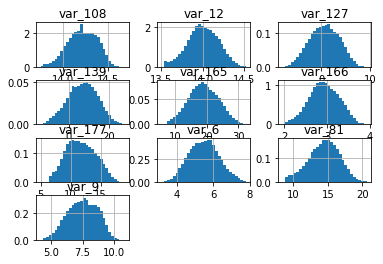

In [121]:
#distribution of first 10 variables in new_train_1
subs = new_train_1.iloc[:, 0:10]
subs.hist(normed = True, bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F92DCD4630>,
      dtype=object)

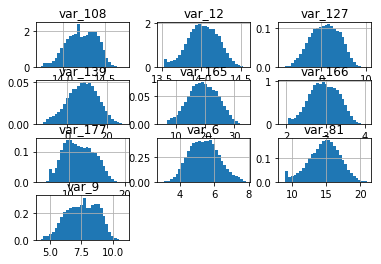

In [122]:
#distribution of first 10 variables in test_1
subs = test_1.iloc[:, 0:10]
subs.hist(normed = True, bins = 30)

Judging by the looks of it, the first 10 variables are fairly normally distributed. So overall, all the variables must be normally distributed too. Therefore, **standardization** needs to be done to bring all variables to a uniform range. Standardization is done so as to make all variables have a standard normal distribution, with mean = 0 and standard deviation = 1.

In [126]:
#standardizing new_train_1
k = new_train_1.columns[0:120]
# print(k)

for i in k:
#     print(i)
    new_train_1[i] = (new_train_1[i] - new_train_1[i].mean())/(new_train_1[i].std())
    
new_train_1.describe()

Index(['var_9', 'var_166', 'var_6', 'var_139', 'var_108', 'var_81', 'var_127',
       'var_12', 'var_165', 'var_177',
       ...
       'var_156', 'var_75', 'var_114', 'var_185', 'var_144', 'var_7', 'var_63',
       'var_35', 'var_180', 'var_126'],
      dtype='object', length=120)
var_9
var_166
var_6
var_139
var_108
var_81
var_127
var_12
var_165
var_177
var_192
var_94
var_99
var_121
var_169
var_1
var_0
var_53
var_78
var_22
var_91
var_174
var_33
var_92
var_133
var_198
var_146
var_131
var_173
var_32
var_164
var_34
var_109
var_26
var_13
var_179
var_2
var_122
var_71
var_170
var_43
var_24
var_188
var_76
var_110
var_31
var_115
var_148
var_191
var_36
var_128
var_125
var_21
var_89
var_119
var_197
var_95
var_184
var_112
var_8
var_80
var_49
var_56
var_106
var_154
var_145
var_44
var_189
var_190
var_15
var_196
var_155
var_18
var_194
var_11
var_67
var_88
var_116
var_40
var_107
var_150
var_85
var_118
var_59
var_113
var_137
var_140
var_14
var_23
var_103
var_130
var_3
var_87
var_195
var_132
var_77
va

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_156,var_75,var_114,var_185,var_144,var_7,var_63,var_35,var_180,var_126
count,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,...,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05
mean,-2.026187e-14,1.470160e-14,-7.327144e-14,2.720797e-15,2.903973e-12,-1.282621e-14,4.234965e-15,1.539805e-14,-6.115638e-14,-2.560485e-14,...,4.463622e-13,-1.588540e-14,8.462370e-15,5.013130e-16,4.606997e-14,9.858087e-14,4.036181e-16,1.621543e-14,-2.596414e-15,-2.311137e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.875002e+00,-2.810587e+00,-2.851435e+00,-2.827484e+00,-2.925622e+00,-2.729269e+00,-2.918529e+00,-2.752999e+00,-2.827536e+00,-2.775652e+00,...,-2.951488e+00,-2.859037e+00,-2.795262e+00,-2.827571e+00,-2.849454e+00,-2.925733e+00,-2.893699e+00,-2.827925e+00,-2.871837e+00,-2.694944e+00
25%,-7.369706e-01,-6.968301e-01,-7.266321e-01,-7.034622e-01,-7.133032e-01,-6.770035e-01,-7.280529e-01,-6.785343e-01,-6.998561e-01,-7.637528e-01,...,-7.470068e-01,-7.114116e-01,-6.860798e-01,-7.013131e-01,-7.108827e-01,-7.408362e-01,-7.110270e-01,-7.076938e-01,-7.295256e-01,-7.505852e-01
50%,3.252274e-02,-1.225046e-02,-8.720889e-04,2.427429e-02,1.118206e-03,4.671984e-02,1.348289e-02,-2.534260e-03,-1.671038e-02,-5.260025e-02,...,-3.021041e-02,-6.655982e-03,-7.357756e-05,5.739119e-03,8.130758e-03,-2.273077e-02,1.811453e-04,1.616202e-02,1.007157e-02,-3.163305e-02
75%,7.838722e-01,7.246173e-01,6.868033e-01,7.184495e-01,7.742045e-01,7.119542e-01,7.415852e-01,7.233393e-01,7.155066e-01,7.427263e-01,...,7.280676e-01,7.325001e-01,7.166526e-01,7.045354e-01,7.098914e-01,7.233617e-01,7.336361e-01,6.961528e-01,6.966382e-01,7.575939e-01
max,2.914259e+00,2.858913e+00,2.812835e+00,2.858548e+00,2.989401e+00,2.799529e+00,2.942463e+00,2.828627e+00,2.844960e+00,3.001301e+00,...,2.944856e+00,2.899023e+00,2.826272e+00,2.826017e+00,2.841752e+00,2.921542e+00,2.911029e+00,2.801235e+00,2.811013e+00,3.013966e+00


So we see that all variables have been standardized for **new_train_1**. The means have become 0 and the standard deviations have become 1. So all the variables are now scaled uniformly.

Let us do the same for **test_1**, **new_train_2** and **test_2**.

In [131]:
#standardizing test_1
p = test_1.columns
for i in p:
    test_1[i] = (test_1[i] - test_1[i].mean())/(test_1[i].std())
    
#standardizing new_train_2
m = new_train_2.columns[0:74]
for i in m:
    new_train_2[i] = (new_train_2[i] - new_train_2[i].mean())/(new_train_2[i].std())
    
#standardizing test_2
n = test_2.columns
for i in n:
    test_2[i] = (test_2[i] - test_2[i].mean())/(test_2[i].std())

In [134]:
test_1.describe()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_156,var_75,var_114,var_185,var_144,var_7,var_63,var_35,var_180,var_126
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,...,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,1.034126e-14,-8.010617e-14,6.778218e-14,-1.170649e-14,9.487090e-13,-1.118506e-13,5.200035e-17,-1.017316e-12,-7.666529e-14,5.615440e-15,...,3.713526e-13,4.696714e-14,2.605780e-14,-3.143265e-15,-1.552203e-14,-5.276743e-14,-4.717430e-15,-8.594013e-15,1.328729e-14,-7.346869e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.700057e+00,-2.877729e+00,-2.889439e+00,-2.803042e+00,-2.841868e+00,-2.694282e+00,-3.017022e+00,-2.789439e+00,-2.839729e+00,-2.603881e+00,...,-2.935348e+00,-2.905254e+00,-2.767997e+00,-2.858493e+00,-2.931055e+00,-2.884920e+00,-2.953461e+00,-2.864792e+00,-2.934777e+00,-2.479234e+00
25%,-7.676223e-01,-7.186305e-01,-7.439828e-01,-6.940022e-01,-7.373294e-01,-6.570238e-01,-7.476469e-01,-6.928771e-01,-7.087617e-01,-7.884233e-01,...,-7.661483e-01,-7.214628e-01,-7.012103e-01,-7.158906e-01,-7.383251e-01,-7.578904e-01,-7.245683e-01,-7.198912e-01,-7.433157e-01,-7.703190e-01
50%,5.081118e-02,-4.330164e-03,-2.583514e-02,3.451969e-02,1.279163e-02,5.955038e-02,2.197425e-02,1.019006e-02,-5.229502e-03,-5.973137e-02,...,-2.528724e-02,9.255156e-05,-3.098846e-04,5.045890e-03,7.435088e-03,-3.085633e-02,3.318202e-03,1.227630e-02,9.357196e-03,-4.351985e-02
75%,8.242926e-01,7.526230e-01,6.839640e-01,7.154058e-01,8.072434e-01,7.011630e-01,7.730495e-01,7.390627e-01,7.388902e-01,7.759067e-01,...,7.533000e-01,7.564628e-01,7.422285e-01,7.077917e-01,7.230613e-01,7.493962e-01,7.560909e-01,7.053124e-01,7.172083e-01,7.853290e-01
max,2.787798e+00,2.946276e+00,2.824435e+00,2.830083e+00,3.020859e+00,2.744763e+00,2.956662e+00,2.876703e+00,2.911826e+00,3.100357e+00,...,3.019284e+00,2.934353e+00,2.891706e+00,2.836023e+00,2.913298e+00,3.004414e+00,2.977835e+00,2.820905e+00,2.848661e+00,2.902314e+00


In [135]:
new_train_2.describe()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_154,var_145,var_44,var_189,var_190,var_15,var_196,var_155,var_18,var_194
count,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,...,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05,3.598040e+05
mean,-2.026187e-14,1.470160e-14,-7.327144e-14,2.720797e-15,2.903973e-12,-1.282621e-14,4.234965e-15,1.539805e-14,-6.115638e-14,-2.560485e-14,...,-8.398649e-15,7.996731e-15,5.240520e-15,2.241372e-14,2.479504e-14,3.032165e-14,-8.197056e-15,-3.393497e-15,1.462284e-15,-1.860304e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.875002e+00,-2.810587e+00,-2.851435e+00,-2.827484e+00,-2.925622e+00,-2.729269e+00,-2.918529e+00,-2.752999e+00,-2.827536e+00,-2.775652e+00,...,-2.876564e+00,-2.893382e+00,-2.685958e+00,-2.921685e+00,-2.841565e+00,-2.882383e+00,-3.008373e+00,-2.827917e+00,-2.940544e+00,-2.897364e+00
25%,-7.369706e-01,-6.968301e-01,-7.266321e-01,-7.034622e-01,-7.133032e-01,-6.770035e-01,-7.280529e-01,-6.785343e-01,-6.998561e-01,-7.637528e-01,...,-7.193833e-01,-7.328028e-01,-6.364617e-01,-7.277542e-01,-7.149006e-01,-7.253320e-01,-7.468824e-01,-7.141318e-01,-7.462505e-01,-7.328966e-01
50%,3.252274e-02,-1.225046e-02,-8.720889e-04,2.427429e-02,1.118206e-03,4.671984e-02,1.348289e-02,-2.534260e-03,-1.671038e-02,-5.260025e-02,...,-4.934501e-03,1.697746e-02,7.731458e-02,-6.217103e-04,2.673782e-15,2.284499e-03,2.402764e-02,-3.126526e-15,1.426709e-03,-1.560662e-02
75%,7.838722e-01,7.246173e-01,6.868033e-01,7.184495e-01,7.742045e-01,7.119542e-01,7.415852e-01,7.233393e-01,7.155066e-01,7.427263e-01,...,7.374082e-01,7.072066e-01,7.043257e-01,7.341636e-01,6.962991e-01,7.104252e-01,7.613490e-01,6.856216e-01,7.166171e-01,7.361686e-01
max,2.914259e+00,2.858913e+00,2.812835e+00,2.858548e+00,2.989401e+00,2.799529e+00,2.942463e+00,2.828627e+00,2.844960e+00,3.001301e+00,...,2.923385e+00,2.862592e+00,2.742205e+00,2.924545e+00,2.820185e+00,2.861881e+00,2.979557e+00,2.800368e+00,2.909421e+00,2.938212e+00


In [136]:
test_2.describe()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_154,var_145,var_44,var_189,var_190,var_15,var_196,var_155,var_18,var_194
count,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,...,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05,2.000000e+05
mean,1.034126e-14,-8.010617e-14,6.778218e-14,-1.170649e-14,9.487090e-13,-1.118506e-13,5.200035e-17,-1.017316e-12,-7.666529e-14,5.615440e-15,...,-2.849274e-15,2.523204e-14,1.304576e-14,-1.653228e-14,-1.127367e-14,1.130753e-13,-4.538029e-15,-6.556591e-15,-2.617377e-14,7.162023e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.700057e+00,-2.877729e+00,-2.889439e+00,-2.803042e+00,-2.841868e+00,-2.694282e+00,-3.017022e+00,-2.789439e+00,-2.839729e+00,-2.603881e+00,...,-2.978139e+00,-2.931702e+00,-2.651569e+00,-3.021154e+00,-2.856624e+00,-2.984709e+00,-2.980916e+00,-2.849517e+00,-2.912082e+00,-2.742901e+00
25%,-7.676223e-01,-7.186305e-01,-7.439828e-01,-6.940022e-01,-7.373294e-01,-6.570238e-01,-7.476469e-01,-6.928771e-01,-7.087617e-01,-7.884233e-01,...,-7.343924e-01,-7.541917e-01,-6.214400e-01,-7.544963e-01,-7.241540e-01,-7.567516e-01,-7.784116e-01,-7.250264e-01,-7.681956e-01,-7.521402e-01
50%,5.081118e-02,-4.330164e-03,-2.583514e-02,3.451969e-02,1.279163e-02,5.955038e-02,2.197425e-02,1.019006e-02,-5.229502e-03,-5.973137e-02,...,2.916492e-03,1.592970e-02,6.992388e-02,4.061955e-03,-5.894490e-03,-2.226673e-03,2.069301e-02,7.474663e-03,-7.874526e-03,-6.135168e-03
75%,8.242926e-01,7.526230e-01,6.839640e-01,7.154058e-01,8.072434e-01,7.011630e-01,7.730495e-01,7.390627e-01,7.388902e-01,7.759067e-01,...,7.652267e-01,7.266313e-01,6.987991e-01,7.579068e-01,6.920430e-01,7.335780e-01,7.764659e-01,6.850286e-01,7.326352e-01,7.625653e-01
max,2.787798e+00,2.946276e+00,2.824435e+00,2.830083e+00,3.020859e+00,2.744763e+00,2.956662e+00,2.876703e+00,2.911826e+00,3.100357e+00,...,3.009215e+00,2.909865e+00,2.713646e+00,2.956322e+00,2.821587e+00,2.875228e+00,2.502559e+00,2.810007e+00,2.980346e+00,2.977407e+00


Now both pairs of datasets have been scaled. Means and standard deviations for all variables have become 0 and 1 respectively.

Let us save all datasets for ease.

In [138]:
#saving new_train_1 to disk
new_train_1.to_csv("new_train_1_scaled.csv", index = False, header = True)

#saving test_1 to disk
test_1.to_csv("test_1_scaled.csv", index = False, header = True)

#saving new_train_2 to disk
new_train_2.to_csv("new_train_2_scaled.csv", index = False, header = True)

#saving test_2 to disk
test_2.to_csv("test_2_scaled.csv", index = False, header = True)

## Splitting the datasets

Before implementing any algorithm on the datasets, it is very important to split the two train datasets (**new_train_1** and **new_train_2**) in a 80-20 way. This is because of the fact that the two respective test datasets have no **target** variable in it and there is no way the credibility or accuracy of the models can be determined. So 80% of the train datasets would be used to train the models, and then the models would be implemented on the other 20% so as to determine their accuracies. Then and only then will the models be applied on the test datasets.

In [157]:
#splitting 
from sklearn.model_selection import train_test_split

#splitting new_train_1
nt1_train, nt1_test = train_test_split(new_train_1, test_size = 0.2)

#splitting new_train_2
nt2_train, nt2_test = train_test_split(new_train_2, test_size = 0.2)

#checking shapes
print(nt1_train.shape)
print(nt1_test.shape)
print(nt2_train.shape)
print(nt2_test.shape)

(287843, 121)
(71961, 121)
(287843, 75)
(71961, 75)


In [158]:
#saving these to disk
nt1_train.to_csv("nt1_train.csv", header = True, index = False)
nt1_test.to_csv("nt1_test.csv", header = True, index = False)
nt2_train.to_csv("nt2_train.csv", header = True, index = False)
nt2_test.to_csv("nt2_test.csv", header = True, index = False)

In [82]:
nt1_train = pd.read_csv("nt1_train.csv", sep = ",", encoding = "ISO-8859-1")
nt1_test = pd.read_csv("nt1_test.csv", sep = ",", encoding = "ISO-8859-1")
nt2_train = pd.read_csv("nt2_train.csv", sep = ",", encoding = "ISO-8859-1")
nt2_test = pd.read_csv("nt2_test.csv", sep = ",", encoding = "ISO-8859-1")
test_1 = pd.read_csv("test_1_scaled.csv", sep = ",", encoding = "ISO-8859-1")
test_2 = pd.read_csv("test_2_scaled.csv", sep = ",", encoding = "ISO-8859-1")

## Machine Learning Algorithm Implementation

Now that everything has been done, I will start implementing different ML algorithms (on both pairs of datasets) and check the **AUCScore**, **Precision** and **Recall** of all the models individually. Here I will be using the following algorithms:

+ Logistic Regression
+ Decision Tree
+ Naive Bayes Algorithm

### Logistic Regression

#### 1st step: 

Making model on **nt1_train** and testing on **nt1_test**.

In [89]:
#checking head and shape
print(nt1_train.head())
print(nt1_train.shape)

      var_9   var_166     var_6   var_139   var_108    var_81   var_127  \
0  2.101198 -0.142771 -1.637596  0.397289 -1.133191 -0.248467  1.063005   
1  0.735550  1.224123 -0.954559  0.937476  1.066724 -0.390707  0.331059   
2  0.381727  1.238974  0.463153 -0.415074 -0.839828  0.176994  0.281433   
3  0.370706 -0.583788  0.635878 -0.659348 -0.085562 -1.577284  0.671428   
4  1.313960 -1.968367 -0.288604  0.499522  0.606052  1.249820  0.315291   

     var_12   var_165   var_177  ...    var_75   var_114   var_185   var_144  \
0 -0.709357  1.750671 -0.219052  ...  0.296765  2.180934 -1.529105  0.747367   
1  0.930290  0.631784  1.923323  ...  1.211967 -0.332964 -0.580931  0.617498   
2  0.339709  0.619538 -0.155752  ... -0.072281 -0.421079  0.648363 -1.617394   
3 -0.816020  0.638392  0.081507  ...  0.765019  0.864723 -0.430640 -1.295276   
4 -1.904657 -0.767529 -1.349715  ...  0.426843  0.568422 -1.239834  1.283386   

      var_7    var_63    var_35   var_180   var_126  target  
0 -0.4

In [5]:
# #replace target values with 0 and 1
# nt1_train["target"] = nt1_train["target"].replace("No", 0)
# nt1_train["target"] = nt1_train["target"].replace("Yes", 1)

In [92]:
#checking distribution of target class
nt1_train["target"].value_counts()

1    144234
0    143609
Name: target, dtype: int64

In [91]:
#importing required library
import statsmodels.api as sm

In [94]:
#building 1st logistic model
logit_model_1 = sm.Logit(nt1_train.iloc[:, 120], nt1_train.iloc[:, 0:120]).fit()

Optimization terminated successfully.
         Current function value: 0.461871
         Iterations 6


In [95]:
#checking summary
logit_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               287843
Model:                          Logit   Df Residuals:                   287723
Method:                           MLE   Df Model:                          119
Date:                Fri, 18 Oct 2019   Pseudo R-squ.:                  0.3337
Time:                        23:08:18   Log-Likelihood:            -1.3295e+05
converged:                       True   LL-Null:                   -1.9952e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_9         -0.1394      0.005    -28.819      0.000      -0.149      -0.130
var_166       -0.1895      0.005    -39.070      0.000      -0.199      -0.180
var_6          0.2517      0.005     51.782      0.000       0.242       0.261
var_139       -0.2594      0.005    -53.269      0.000      -0.269      -0.250
var_108       -0.1658      0.005    -34.296      0.000      -0.175      -0.156
var_81        -0.2805      0.005    -57.372      0.000      -0.290      -0.271
var_127       -0.1440      0.005    -29.822      0.000      -0.153      -0.135
var_12        -0.2475      0.005    -50.646      0.000      -0.257      -0.238
var_165       -0.2027      0.005    -41.748      0.000      -0.212      -0.193
var_177       -0.1331      0.005    -27.476      0.000      -0.143      -0.124
var_192       -0.1504      0.005    -31.023      0.000      -0.160      -0.141
var_94         0.1783      0.005     36.829      0.000       0.169       0.188
var_99         0.2186      0.005     45.055      0.000       0.209       0.228
var_121       -0.1454      0.005    -30.014      0.000      -0.155      -0.136
var_169       -0.1678      0.005    -34.667      0.000      -0.177      -0.158
var_1          0.1640      0.005     33.845      0.000       0.155       0.174
var_0          0.1687      0.005     34.863      0.000       0.159       0.178
var_53         0.2357      0.005     48.446      0.000       0.226       0.245
var_78         0.1698      0.005     35.028      0.000       0.160       0.179
var_22         0.2105      0.005     43.474      0.000       0.201       0.220
var_91         0.1364      0.005     28.173      0.000       0.127       0.146
var_174       -0.2128      0.005    -43.727      0.000      -0.222      -0.203
var_33        -0.1655      0.005    -34.137      0.000      -0.175      -0.156
var_92        -0.1634      0.005    -33.718      0.000      -0.173      -0.154
var_133        0.1855      0.005     38.227      0.000       0.176       0.195
var_198       -0.1821      0.005    -37.592      0.000      -0.192      -0.173
var_146       -0.2253      0.005    -46.331      0.000      -0.235      -0.216
var_131       -0.1178      0.005    -24.345      0.000      -0.127      -0.108
var_173        0.1641      0.005     33.837      0.000       0.155       0.174
var_32         0.1247      0.005     25.805      0.000       0.115       0.134
var_164        0.1414      0.005     29.240      0.000       0.132       0.151
var_34        -0.1761      0.005    -36.285      0.000      -0.186      -0.167
var_109       -0.1818      0.005    -37.485      0.000      -0.191      -0.172
var_26         0.2197      0.005     45.298      0.000       0.210       0.229
var_13        -0.1830      0.005    -37.787      0.000      -0.192      -0.174
var_179        0.1755      0.005     36.124      0.000       0.166       0.185
var_2          0.1874      0.005     38.661      0.000       0.178       0.197
var_122       -0.1537      0.005    -31.698      0.000      -0.163      -0.144
va

In [96]:
#applying model on nt1_test
nt1_test["actualprob"] = logit_model_1.predict(nt1_test.iloc[:, 0:120]) 

In [97]:
nt1_test.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_114,var_185,var_144,var_7,var_63,var_35,var_180,var_126,target,actualprob
0,-0.810107,-0.237731,0.918419,-1.775639,0.575748,0.760216,-1.017226,-0.380476,-0.607165,-0.030487,...,0.322612,0.359720,0.452256,1.210712,-1.111372,0.543022,0.363271,-0.180206,1,0.252931
1,0.937760,-1.955492,-0.263832,-0.584497,0.819877,-1.174107,-0.616821,0.349066,0.071422,-0.379628,...,1.523790,-0.421355,-0.001922,-2.338001,0.485087,1.542960,0.802117,-0.350753,0,0.468963
2,-0.410445,0.018355,1.204088,0.977083,-0.962620,-0.413470,-0.443221,-0.277955,0.029181,-0.072039,...,0.571399,-1.096028,0.180168,-0.713242,-0.890101,1.667280,-0.466649,-0.254317,1,0.923599
3,0.254247,0.382166,-0.164337,-0.017553,-1.404847,-0.093946,0.346101,0.724440,-0.490967,-0.183365,...,0.880310,-1.068732,-1.160807,1.055011,-0.817431,-1.335190,-0.509322,0.637866,0,0.297153
4,-0.168876,-0.931035,-0.501521,-1.187242,0.635052,1.072315,-0.833915,-0.100062,1.546556,-0.432772,...,-1.187985,0.607338,-0.788851,-0.646598,-1.215333,-0.112246,-1.253406,-0.465625,0,0.416187


In [98]:
#convert probs to 0 and 1
nt1_test["predval"] = 1
nt1_test.loc[nt1_test.actualprob < 0.5, "predval"] = 0

In [99]:
nt1_test.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_185,var_144,var_7,var_63,var_35,var_180,var_126,target,actualprob,predval
0,-0.810107,-0.237731,0.918419,-1.775639,0.575748,0.760216,-1.017226,-0.380476,-0.607165,-0.030487,...,0.359720,0.452256,1.210712,-1.111372,0.543022,0.363271,-0.180206,1,0.252931,0
1,0.937760,-1.955492,-0.263832,-0.584497,0.819877,-1.174107,-0.616821,0.349066,0.071422,-0.379628,...,-0.421355,-0.001922,-2.338001,0.485087,1.542960,0.802117,-0.350753,0,0.468963,0
2,-0.410445,0.018355,1.204088,0.977083,-0.962620,-0.413470,-0.443221,-0.277955,0.029181,-0.072039,...,-1.096028,0.180168,-0.713242,-0.890101,1.667280,-0.466649,-0.254317,1,0.923599,1
3,0.254247,0.382166,-0.164337,-0.017553,-1.404847,-0.093946,0.346101,0.724440,-0.490967,-0.183365,...,-1.068732,-1.160807,1.055011,-0.817431,-1.335190,-0.509322,0.637866,0,0.297153,0
4,-0.168876,-0.931035,-0.501521,-1.187242,0.635052,1.072315,-0.833915,-0.100062,1.546556,-0.432772,...,0.607338,-0.788851,-0.646598,-1.215333,-0.112246,-1.253406,-0.465625,0,0.416187,0


Thus, we now have an **actualprob** column in **nt1_test** which is the actual probabilistic score for customer transaction. This is then converted to either 0 or 1 in the **predval** column, taking scores from 0 to 0.5 as 0 and scores from 0.5 to 1 as 1, with 0 being no transaction and 1 being transaction made by customer.

Now, let us check the AUC score, precision and recall of the **logit_model_1** model.

In [11]:
#importing required library
from sklearn.metrics import roc_auc_score

#checking auc score
roc_auc_score(np.array(nt1_test["target"]), np.array(nt1_test["predval"]))

In [105]:
#building confusion matrix to check precision and recall
CM = pd.crosstab(nt1_test["target"], nt1_test["predval"])
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
FP = CM.iloc[0,1]
TP = CM.iloc[1,1]

#checking confusion matrix
print(CM)

predval      0      1
target               
0        27932   8361
1         7179  28489


In [106]:
#precision
print(TP/(TP + FP))

#recall
print(TP/(TP + FN))

0.7731071913161466
0.7987271503869015


Thus for the 1st logistic model **logit_model_1**, we got:

+ AUC Score: 0.784
+ Precision: 0.773
+ Recall: 0.798

#### 2nd step: 

Making model on **nt2_train** and testing on **nt2_test**.

In [108]:
#printing head and shape
print(nt2_train.head())
print(nt2_train.shape)

      var_9   var_166     var_6   var_139   var_108    var_81   var_127  \
0 -1.174408 -1.626478  0.701575 -1.366383 -0.785869  0.232505  0.934898   
1 -1.153980 -0.004540  1.833132  1.410132 -1.686426 -0.613648 -1.856184   
2  0.996716  0.788293 -1.602070  1.245252 -1.032096  0.813116  1.984043   
3  0.283725 -2.133994 -0.405200 -0.277908 -0.282872 -1.688771 -0.639537   
4  0.299416  0.052923 -0.303835  0.356950  0.429298 -0.814395 -1.595046   

     var_12   var_165   var_177  ...   var_145    var_44   var_189   var_190  \
0  1.427854  0.433011  1.293544  ...  1.093805  0.132522  0.565690  0.391779   
1 -0.824941 -1.557278  0.178694  ... -0.179227  1.619810 -0.560279 -0.637574   
2 -1.264712 -1.750097  0.432588  ...  0.825894  0.308754 -0.677844  0.548876   
3  0.934694 -0.533217 -0.795647  ... -1.443305 -0.154269 -0.001065 -1.004010   
4  1.080181 -0.064369 -0.978906  ... -0.342302 -0.474990 -0.071772 -0.427604   

     var_15   var_196   var_155    var_18   var_194  target  
0 -0.1

In [109]:
#replace target values with 0 and 1
nt2_train["target"] = nt2_train["target"].replace("No", 0)
nt2_train["target"] = nt2_train["target"].replace("Yes", 1)

In [110]:
#checking distribution of target class
nt2_train["target"].value_counts()

0    144023
1    143820
Name: target, dtype: int64

In [111]:
#building 2nd logistic model
logit_model_2 = sm.Logit(nt2_train.iloc[:, 74], nt2_train.iloc[:, 0:74]).fit()

Optimization terminated successfully.
         Current function value: 0.493550
         Iterations 6


In [112]:
#checking summary
logit_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               287843
Model:                          Logit   Df Residuals:                   287769
Method:                           MLE   Df Model:                           73
Date:                Fri, 18 Oct 2019   Pseudo R-squ.:                  0.2880
Time:                        23:38:49   Log-Likelihood:            -1.4207e+05
converged:                       True   LL-Null:                   -1.9952e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_9         -0.1451      0.005    -31.193      0.000      -0.154      -0.136
var_166       -0.1953      0.005    -41.856      0.000      -0.204      -0.186
var_6          0.2446      0.005     52.376      0.000       0.235       0.254
var_139       -0.2592      0.005    -55.376      0.000      -0.268      -0.250
var_108       -0.1597      0.005    -34.349      0.000      -0.169      -0.151
var_81        -0.2787      0.005    -59.372      0.000      -0.288      -0.269
var_127       -0.1420      0.005    -30.579      0.000      -0.151      -0.133
var_12        -0.2444      0.005    -52.096      0.000      -0.254      -0.235
var_165       -0.2069      0.005    -44.333      0.000      -0.216      -0.198
var_177       -0.1347      0.005    -28.929      0.000      -0.144      -0.126
var_192       -0.1538      0.005    -32.993      0.000      -0.163      -0.145
var_94         0.1743      0.005     37.428      0.000       0.165       0.183
var_99         0.2148      0.005     45.950      0.000       0.206       0.224
var_121       -0.1445      0.005    -31.046      0.000      -0.154      -0.135
var_169       -0.1730      0.005    -37.160      0.000      -0.182      -0.164
var_1          0.1678      0.005     36.039      0.000       0.159       0.177
var_0          0.1666      0.005     35.818      0.000       0.157       0.176
var_53         0.2349      0.005     50.195      0.000       0.226       0.244
var_78         0.1667      0.005     35.785      0.000       0.158       0.176
var_22         0.2102      0.005     45.147      0.000       0.201       0.219
var_91         0.1415      0.005     30.459      0.000       0.132       0.151
var_174       -0.2175      0.005    -46.462      0.000      -0.227      -0.208
var_33        -0.1615      0.005    -34.647      0.000      -0.171      -0.152
var_92        -0.1614      0.005    -34.619      0.000      -0.171      -0.152
var_133        0.1963      0.005     42.105      0.000       0.187       0.205
var_198       -0.1877      0.005    -40.310      0.000      -0.197      -0.179
var_146       -0.2227      0.005    -47.669      0.000      -0.232      -0.214
var_131       -0.1188      0.005    -25.522      0.000      -0.128      -0.110
var_173        0.1613      0.005     34.607      0.000       0.152       0.170
var_32         0.1211      0.005     26.088      0.000       0.112       0.130
var_164        0.1400      0.005     30.092      0.000       0.131       0.149
var_34        -0.1701      0.005    -36.462      0.000      -0.179      -0.161
var_109       -0.1829      0.005    -39.232      0.000      -0.192      -0.174
var_26         0.2205      0.005     47.254      0.000       0.211       0.230
var_13        -0.1873      0.005    -40.176      0.000      -0.196      -0.178
var_179        0.1737      0.005     37.205      0.000       0.165       0.183
var_2          0.1879      0.005     40.335      0.000       0.179       0.197
var_122       -0.1570      0.005    -33.715      0.000      -0.166      -0.148
va

In [114]:
#applying model on nt2_test
nt2_test["actualprob"] = logit_model_2.predict(nt2_test.iloc[:, 0:74]) 

In [117]:
nt2_test.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_189,var_190,var_15,var_196,var_155,var_18,var_194,target,actualprob,predval
0,0.460335,0.661486,-0.642768,0.561320,-0.790831,-0.462097,0.464112,-0.695597,0.128073,-0.312208,...,-1.306266,0.940090,0.514579,-0.825287,-0.390246,0.821774,0.461658,No,0.220627,0
1,-0.388928,1.465457,2.010026,-0.081446,0.949502,-0.052425,1.731375,0.343012,-1.132536,0.148227,...,-0.242186,-0.667608,-1.653756,-0.316626,-0.800529,-1.756473,-0.372015,Yes,0.957429,1
2,1.075842,0.326759,-0.642523,-0.316567,-1.787522,0.616535,-0.819351,-0.113272,-1.042967,0.908481,...,0.073800,-1.247483,0.412762,-0.311027,0.326643,-1.705113,-1.009409,No,0.208637,0
3,-0.030191,0.608649,0.348520,-0.127302,0.675366,0.909292,0.745090,1.301812,-2.295489,1.792848,...,-1.396880,-1.198807,-0.694367,1.512897,0.333609,1.505158,-1.393983,No,0.698414,1
4,0.268038,0.567808,1.096625,0.966538,-0.233874,0.498046,0.211819,0.379889,0.586198,-0.846262,...,-0.121182,-0.616917,-0.418569,-1.587799,-1.377372,0.165838,-0.632544,No,0.071807,0


In [116]:
#convert probs to 0 and 1
nt2_test["predval"] = 1
nt2_test.loc[nt2_test.actualprob < 0.5, "predval"] = 0

In [118]:
#replace target values with 0 and 1
nt2_test["target"] = nt2_test["target"].replace("No", 0)
nt2_test["target"] = nt2_test["target"].replace("Yes", 1)

In [119]:
nt2_test.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_189,var_190,var_15,var_196,var_155,var_18,var_194,target,actualprob,predval
0,0.460335,0.661486,-0.642768,0.561320,-0.790831,-0.462097,0.464112,-0.695597,0.128073,-0.312208,...,-1.306266,0.940090,0.514579,-0.825287,-0.390246,0.821774,0.461658,0,0.220627,0
1,-0.388928,1.465457,2.010026,-0.081446,0.949502,-0.052425,1.731375,0.343012,-1.132536,0.148227,...,-0.242186,-0.667608,-1.653756,-0.316626,-0.800529,-1.756473,-0.372015,1,0.957429,1
2,1.075842,0.326759,-0.642523,-0.316567,-1.787522,0.616535,-0.819351,-0.113272,-1.042967,0.908481,...,0.073800,-1.247483,0.412762,-0.311027,0.326643,-1.705113,-1.009409,0,0.208637,0
3,-0.030191,0.608649,0.348520,-0.127302,0.675366,0.909292,0.745090,1.301812,-2.295489,1.792848,...,-1.396880,-1.198807,-0.694367,1.512897,0.333609,1.505158,-1.393983,0,0.698414,1
4,0.268038,0.567808,1.096625,0.966538,-0.233874,0.498046,0.211819,0.379889,0.586198,-0.846262,...,-0.121182,-0.616917,-0.418569,-1.587799,-1.377372,0.165838,-0.632544,0,0.071807,0


Thus, we now have an **actualprob** column in **nt2_test** which is the actual probabilistic score for customer transaction. This is then converted to either 0 or 1 in the **predval** column, taking scores from 0 to 0.5 as 0 and scores from 0.5 to 1 as 1, with 0 being no transaction and 1 being transaction made by customer.

Now, let us check the AUC score, precision and recall of the **logit_model_2** model.

In [120]:
#checking AUC score
roc_auc_score(np.array(nt2_test["target"]), np.array(nt2_test["predval"]))

0.7611125503699415

In [121]:
#building confusion matrix to check precision and recall
CM = pd.crosstab(nt2_test["target"], nt2_test["predval"])
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
FP = CM.iloc[0,1]
TP = CM.iloc[1,1]

#checking confusion matrix
CM

predval,0,1
target,,
0,26852,9027
1,8161,27921


In [122]:
#precision
print(TP/(TP + FP))

#recall
print(TP/(TP + FN))

0.7556836635271192
0.773820741644033


Thus for the 2nd logistic model **logit_model_2**, we got:

+ AUC Score: 0.761
+ Precision: 0.755
+ Recall: 0.773

#### 3rd step: 

Applying **logit_model_1** on original **test_1**.

In [123]:
#checking head and shape
print(test_1.head())
print(test_1.shape)

      var_9   var_166     var_6   var_139   var_108    var_81   var_127  \
0  1.007084 -1.105746  0.503543 -1.346364 -1.210384  0.953776  1.013123   
1 -1.295196  0.690533  0.701009 -0.131046 -2.501222 -0.299404 -2.224300   
2  0.628959  0.436236 -0.602985 -1.802931 -1.177719 -0.172879  0.469680   
3 -0.090600 -0.867106 -0.551155  0.657567 -0.146449  0.311529  0.243510   
4 -0.345580  0.734536  1.674888  0.528122 -0.022790  0.892591 -0.893562   

     var_12   var_165   var_177  ...   var_156    var_75   var_114   var_185  \
0 -0.278936  0.722514 -0.625130  ... -1.362095  0.796390 -1.011015  0.593822   
1  0.475742 -0.756027 -1.406762  ...  1.743637  0.215993  1.048039 -1.040994   
2 -1.829897 -1.195738  1.437990  ... -0.644563 -0.062510 -2.144827  0.100655   
3  0.158176  1.103736  0.790450  ...  0.414921 -0.768425 -0.974693  1.621505   
4  0.414651  1.368616 -0.665677  ... -0.116923 -1.208510  0.154440  2.088474   

    var_144     var_7    var_63    var_35   var_180   var_126  
0  0

In [125]:
#applying model
test_1["actualprob"] = logit_model_1.predict(test_1.iloc[:, :])

In [126]:
test_1.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_75,var_114,var_185,var_144,var_7,var_63,var_35,var_180,var_126,actualprob
0,1.007084,-1.105746,0.503543,-1.346364,-1.210384,0.953776,1.013123,-0.278936,0.722514,-0.625130,...,0.796390,-1.011015,0.593822,0.630925,0.508033,0.060506,0.828706,-0.347599,1.178894,0.852206
1,-1.295196,0.690533,0.701009,-0.131046,-2.501222,-0.299404,-2.224300,0.475742,-0.756027,-1.406762,...,0.215993,1.048039,-1.040994,0.462045,0.614396,-0.782959,-0.580043,0.599299,1.324203,0.896407
2,0.628959,0.436236,-0.602985,-1.802931,-1.177719,-0.172879,0.469680,-1.829897,-1.195738,1.437990,...,-0.062510,-2.144827,0.100655,0.804683,1.088258,0.619164,1.174462,-0.069476,1.453209,0.462550
3,-0.090600,-0.867106,-0.551155,0.657567,-0.146449,0.311529,0.243510,0.158176,1.103736,0.790450,...,-0.768425,-0.974693,1.621505,1.281189,1.179489,0.596709,-1.251500,2.332478,0.653755,0.762775
4,-0.345580,0.734536,1.674888,0.528122,-0.022790,0.892591,-0.893562,0.414651,1.368616,-0.665677,...,-1.208510,0.154440,2.088474,0.679270,-1.730458,1.608053,-0.168316,0.260200,0.128103,0.690843


In [127]:
#convert probs to 0 and 1
test_1["predval"] = 1
test_1.loc[test_1.actualprob < 0.5, "predval"] = 0

In [128]:
test_1.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_114,var_185,var_144,var_7,var_63,var_35,var_180,var_126,actualprob,predval
0,1.007084,-1.105746,0.503543,-1.346364,-1.210384,0.953776,1.013123,-0.278936,0.722514,-0.625130,...,-1.011015,0.593822,0.630925,0.508033,0.060506,0.828706,-0.347599,1.178894,0.852206,1
1,-1.295196,0.690533,0.701009,-0.131046,-2.501222,-0.299404,-2.224300,0.475742,-0.756027,-1.406762,...,1.048039,-1.040994,0.462045,0.614396,-0.782959,-0.580043,0.599299,1.324203,0.896407,1
2,0.628959,0.436236,-0.602985,-1.802931,-1.177719,-0.172879,0.469680,-1.829897,-1.195738,1.437990,...,-2.144827,0.100655,0.804683,1.088258,0.619164,1.174462,-0.069476,1.453209,0.462550,0
3,-0.090600,-0.867106,-0.551155,0.657567,-0.146449,0.311529,0.243510,0.158176,1.103736,0.790450,...,-0.974693,1.621505,1.281189,1.179489,0.596709,-1.251500,2.332478,0.653755,0.762775,1
4,-0.345580,0.734536,1.674888,0.528122,-0.022790,0.892591,-0.893562,0.414651,1.368616,-0.665677,...,0.154440,2.088474,0.679270,-1.730458,1.608053,-0.168316,0.260200,0.128103,0.690843,1


#### 4th step: 

Applying **logit_model_2** on original **test_2**.

In [129]:
#checking head and shape
print(test_2.head())
print(test_2.shape)

      var_9   var_166     var_6   var_139   var_108    var_81   var_127  \
0  1.007084 -1.105746  0.503543 -1.346364 -1.210384  0.953776  1.013123   
1 -1.295196  0.690533  0.701009 -0.131046 -2.501222 -0.299404 -2.224300   
2  0.628959  0.436236 -0.602985 -1.802931 -1.177719 -0.172879  0.469680   
3 -0.090600 -0.867106 -0.551155  0.657567 -0.146449  0.311529  0.243510   
4 -0.345580  0.734536  1.674888  0.528122 -0.022790  0.892591 -0.893562   

     var_12   var_165   var_177  ...   var_154   var_145    var_44   var_189  \
0 -0.278936  0.722514 -0.625130  ...  2.417107 -0.472134  0.753264  0.925644   
1  0.475742 -0.756027 -1.406762  ...  0.161393 -2.555291 -1.182740  0.231025   
2 -1.829897 -1.195738  1.437990  ...  0.058933 -1.276187 -0.113801  0.436880   
3  0.158176  1.103736  0.790450  ... -0.388919 -0.784043 -0.401836  0.568344   
4  0.414651  1.368616 -0.665677  ... -0.710819 -1.663789  1.721976  0.897978   

    var_190    var_15   var_196   var_155    var_18   var_194  
0 -1

In [130]:
#applying model
test_2["actualprob"] = logit_model_2.predict(test_2.iloc[:, :])

In [131]:
test_2.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_145,var_44,var_189,var_190,var_15,var_196,var_155,var_18,var_194,actualprob
0,1.007084,-1.105746,0.503543,-1.346364,-1.210384,0.953776,1.013123,-0.278936,0.722514,-0.625130,...,-0.472134,0.753264,0.925644,-1.181737,-0.179340,0.380898,0.546797,0.040078,-1.364647,0.889176
1,-1.295196,0.690533,0.701009,-0.131046,-2.501222,-0.299404,-2.224300,0.475742,-0.756027,-1.406762,...,-2.555291,-1.182740,0.231025,1.637985,-0.944684,-0.693327,0.607377,1.771103,-0.770696,0.889105
2,0.628959,0.436236,-0.602985,-1.802931,-1.177719,-0.172879,0.469680,-1.829897,-1.195738,1.437990,...,-1.276187,-0.113801,0.436880,-0.871067,-0.878312,-1.725836,-0.026041,0.758667,-1.597063,0.209337
3,-0.090600,-0.867106,-0.551155,0.657567,-0.146449,0.311529,0.243510,0.158176,1.103736,0.790450,...,-0.784043,-0.401836,0.568344,1.406991,0.392237,0.305857,-1.171108,-1.674758,-0.894594,0.624007
4,-0.345580,0.734536,1.674888,0.528122,-0.022790,0.892591,-0.893562,0.414651,1.368616,-0.665677,...,-1.663789,1.721976,0.897978,0.227119,0.017588,-1.368275,-2.296470,0.350075,0.495888,0.539516


In [132]:
#convert probs to 0 and 1
test_2["predval"] = 1
test_2.loc[test_2.actualprob < 0.5, "predval"] = 0

In [133]:
test_2.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_44,var_189,var_190,var_15,var_196,var_155,var_18,var_194,actualprob,predval
0,1.007084,-1.105746,0.503543,-1.346364,-1.210384,0.953776,1.013123,-0.278936,0.722514,-0.625130,...,0.753264,0.925644,-1.181737,-0.179340,0.380898,0.546797,0.040078,-1.364647,0.889176,1
1,-1.295196,0.690533,0.701009,-0.131046,-2.501222,-0.299404,-2.224300,0.475742,-0.756027,-1.406762,...,-1.182740,0.231025,1.637985,-0.944684,-0.693327,0.607377,1.771103,-0.770696,0.889105,1
2,0.628959,0.436236,-0.602985,-1.802931,-1.177719,-0.172879,0.469680,-1.829897,-1.195738,1.437990,...,-0.113801,0.436880,-0.871067,-0.878312,-1.725836,-0.026041,0.758667,-1.597063,0.209337,0
3,-0.090600,-0.867106,-0.551155,0.657567,-0.146449,0.311529,0.243510,0.158176,1.103736,0.790450,...,-0.401836,0.568344,1.406991,0.392237,0.305857,-1.171108,-1.674758,-0.894594,0.624007,1
4,-0.345580,0.734536,1.674888,0.528122,-0.022790,0.892591,-0.893562,0.414651,1.368616,-0.665677,...,1.721976,0.897978,0.227119,0.017588,-1.368275,-2.296470,0.350075,0.495888,0.539516,1


Thus, we have successfully applied models **logit_model_1** and **logit_model_2** on **test_1** and **test_2** respectively.

Let us save these to disk.

In [134]:
#saving to disk
nt1_train.to_csv("nt1_train_after_logit.csv", header = True, index = False)
nt1_test.to_csv("nt1_test_after_logit.csv", header = True, index = False)
nt2_train.to_csv("nt2_train_after_logit.csv", header = True, index = False)
nt2_test.to_csv("nt2_test_after_logit.csv", header = True, index = False)
test_1.to_csv("test_1_after_logit.csv", header = True, index = False)
test_2.to_csv("test_2_after_logit.csv", header = True, index = False)

### Decision Tree

#### 1st step: 

Making model on **nt1_train** and testing on **nt1_test**.

In [155]:
#loading data from disk for Decision Tree
nt1_train = pd.read_csv("nt1_train.csv", sep = ",", encoding = "ISO-8859-1")
nt1_test = pd.read_csv("nt1_test.csv", sep = ",", encoding = "ISO-8859-1")
nt2_train = pd.read_csv("nt2_train.csv", sep = ",", encoding = "ISO-8859-1")
nt2_test = pd.read_csv("nt2_test.csv", sep = ",", encoding = "ISO-8859-1")
test_1 = pd.read_csv("test_1_scaled.csv", sep = ",", encoding = "ISO-8859-1")
test_2 = pd.read_csv("test_2_scaled.csv", sep = ",", encoding = "ISO-8859-1")

In [156]:
#checking head
nt1_train.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_75,var_114,var_185,var_144,var_7,var_63,var_35,var_180,var_126,target
0,2.101198,-0.142771,-1.637596,0.397289,-1.133191,-0.248467,1.063005,-0.709357,1.750671,-0.219052,...,0.296765,2.180934,-1.529105,0.747367,-0.443228,0.806948,1.149875,0.358193,-0.261131,0
1,0.735550,1.224123,-0.954559,0.937476,1.066724,-0.390707,0.331059,0.930290,0.631784,1.923323,...,1.211967,-0.332964,-0.580931,0.617498,-0.091134,-0.211713,-0.492646,0.230093,2.674900,0
2,0.381727,1.238974,0.463153,-0.415074,-0.839828,0.176994,0.281433,0.339709,0.619538,-0.155752,...,-0.072281,-0.421079,0.648363,-1.617394,0.364040,1.905211,0.669244,0.668095,0.443639,0
3,0.370706,-0.583788,0.635878,-0.659348,-0.085562,-1.577284,0.671428,-0.816020,0.638392,0.081507,...,0.765019,0.864723,-0.430640,-1.295276,1.235971,-0.881520,-0.094962,-0.278334,0.872685,1
4,1.313960,-1.968367,-0.288604,0.499522,0.606052,1.249820,0.315291,-1.904657,-0.767529,-1.349715,...,0.426843,0.568422,-1.239834,1.283386,0.908104,1.488015,1.653364,-1.427682,0.981706,1


In [157]:
#importing from library
from sklearn.tree import DecisionTreeClassifier

In [174]:
#applying model on nt1_train
DT_model_1= DecisionTreeClassifier().fit(nt1_train.iloc[:, 0:120], nt1_train.iloc[:, 120])

In [175]:
#checking summary
DT_model_1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [176]:
#applying model on nt1_test
DT_predict_1 = DT_model_1.predict(nt1_test.iloc[:, 0:120])

In [177]:
DT_predict_1

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [178]:
nt1_test["target"]

0        1
1        0
2        1
3        0
4        0
        ..
71956    1
71957    0
71958    0
71959    1
71960    1
Name: target, Length: 71961, dtype: int64

In [179]:
#checking AUC score
roc_auc_score(np.array(nt1_test["target"]), np.array(DT_predict_1))

0.773085855896139

In [180]:
#building confusion matrix to check precision and recall
CM = pd.crosstab(nt1_test["target"], DT_predict_1)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
FP = CM.iloc[0,1]
TP = CM.iloc[1,1]

#checking confusion matrix
CM

col_0,0,1
target,,
0,26546,9747
1,6608,29060


In [181]:
#precision
print(TP/(TP + FP))

#recall
print(TP/(TP + FN))

0.7488339732522483
0.8147358977234496


Thus for the 1st decision tree model **DT_model_1**, we got:

+ AUC Score: 0.773
+ Precision: 0.748
+ Recall: 0.814

#### 2nd step: 

Making model on **nt2_train** and testing on **nt2_test**.

In [182]:
#checking head
nt2_train.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_145,var_44,var_189,var_190,var_15,var_196,var_155,var_18,var_194,target
0,-1.174408,-1.626478,0.701575,-1.366383,-0.785869,0.232505,0.934898,1.427854,0.433011,1.293544,...,1.093805,0.132522,0.565690,0.391779,-0.152742,-0.838992,-0.804383,0.654193,-1.038535,No
1,-1.153980,-0.004540,1.833132,1.410132,-1.686426,-0.613648,-1.856184,-0.824941,-1.557278,0.178694,...,-0.179227,1.619810,-0.560279,-0.637574,0.495685,2.114064,1.888666,0.256548,-1.987858,No
2,0.996716,0.788293,-1.602070,1.245252,-1.032096,0.813116,1.984043,-1.264712,-1.750097,0.432588,...,0.825894,0.308754,-0.677844,0.548876,0.183149,-1.969339,0.819483,1.419572,-1.019826,No
3,0.283725,-2.133994,-0.405200,-0.277908,-0.282872,-1.688771,-0.639537,0.934694,-0.533217,-0.795647,...,-1.443305,-0.154269,-0.001065,-1.004010,-1.148607,0.719334,0.891573,0.867607,1.435688,No
4,0.299416,0.052923,-0.303835,0.356950,0.429298,-0.814395,-1.595046,1.080181,-0.064369,-0.978906,...,-0.342302,-0.474990,-0.071772,-0.427604,-1.201170,1.102920,-0.477497,1.537903,0.548928,Yes


In [183]:
#replace target values with 0 and 1
nt2_train["target"] = nt2_train["target"].replace("No", 0)
nt2_train["target"] = nt2_train["target"].replace("Yes", 1)

In [184]:
#checking head
nt2_train.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_145,var_44,var_189,var_190,var_15,var_196,var_155,var_18,var_194,target
0,-1.174408,-1.626478,0.701575,-1.366383,-0.785869,0.232505,0.934898,1.427854,0.433011,1.293544,...,1.093805,0.132522,0.565690,0.391779,-0.152742,-0.838992,-0.804383,0.654193,-1.038535,0
1,-1.153980,-0.004540,1.833132,1.410132,-1.686426,-0.613648,-1.856184,-0.824941,-1.557278,0.178694,...,-0.179227,1.619810,-0.560279,-0.637574,0.495685,2.114064,1.888666,0.256548,-1.987858,0
2,0.996716,0.788293,-1.602070,1.245252,-1.032096,0.813116,1.984043,-1.264712,-1.750097,0.432588,...,0.825894,0.308754,-0.677844,0.548876,0.183149,-1.969339,0.819483,1.419572,-1.019826,0
3,0.283725,-2.133994,-0.405200,-0.277908,-0.282872,-1.688771,-0.639537,0.934694,-0.533217,-0.795647,...,-1.443305,-0.154269,-0.001065,-1.004010,-1.148607,0.719334,0.891573,0.867607,1.435688,0
4,0.299416,0.052923,-0.303835,0.356950,0.429298,-0.814395,-1.595046,1.080181,-0.064369,-0.978906,...,-0.342302,-0.474990,-0.071772,-0.427604,-1.201170,1.102920,-0.477497,1.537903,0.548928,1


In [185]:
#applying model on nt2_train
DT_model_2= DecisionTreeClassifier().fit(nt2_train.iloc[:, 0:74], nt2_train.iloc[:, 74])

In [186]:
#checking summary
DT_model_2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [187]:
#applying model on nt2_test
DT_predict_2 = DT_model_2.predict(nt2_test.iloc[:, 0:74])

In [188]:
DT_predict_2

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [189]:
nt2_test["target"]

0         No
1        Yes
2         No
3         No
4         No
        ... 
71956    Yes
71957     No
71958    Yes
71959     No
71960    Yes
Name: target, Length: 71961, dtype: object

In [190]:
#replace target values with 0 and 1
nt2_test["target"] = nt2_test["target"].replace("No", 0)
nt2_test["target"] = nt2_test["target"].replace("Yes", 1)

In [191]:
nt2_test["target"]

0        0
1        1
2        0
3        0
4        0
        ..
71956    1
71957    0
71958    1
71959    0
71960    1
Name: target, Length: 71961, dtype: int64

In [192]:
#checking AUC score
roc_auc_score(np.array(nt2_test["target"]), np.array(DT_predict_2))

0.770399621893663

In [193]:
#building confusion matrix to check precision and recall
CM = pd.crosstab(nt2_test["target"], DT_predict_2)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
FP = CM.iloc[0,1]
TP = CM.iloc[1,1]

#checking confusion matrix
CM

col_0,0,1
target,,
0,26179,9700
1,6814,29268


In [194]:
#precision
print(TP/(TP + FP))

#recall
print(TP/(TP + FN))

0.7510778074317389
0.8111523751455019


Thus for the 2nd decision tree model **DT_model_2**, we got:

+ AUC Score: 0.770
+ Precision: 0.751
+ Recall: 0.811

#### 3rd step:

Applying **DT_model_1** on original **test_1**.

In [195]:
#checking head and shape
print(test_1.head())
print(test_1.shape)

      var_9   var_166     var_6   var_139   var_108    var_81   var_127  \
0  1.007084 -1.105746  0.503543 -1.346364 -1.210384  0.953776  1.013123   
1 -1.295196  0.690533  0.701009 -0.131046 -2.501222 -0.299404 -2.224300   
2  0.628959  0.436236 -0.602985 -1.802931 -1.177719 -0.172879  0.469680   
3 -0.090600 -0.867106 -0.551155  0.657567 -0.146449  0.311529  0.243510   
4 -0.345580  0.734536  1.674888  0.528122 -0.022790  0.892591 -0.893562   

     var_12   var_165   var_177  ...   var_156    var_75   var_114   var_185  \
0 -0.278936  0.722514 -0.625130  ... -1.362095  0.796390 -1.011015  0.593822   
1  0.475742 -0.756027 -1.406762  ...  1.743637  0.215993  1.048039 -1.040994   
2 -1.829897 -1.195738  1.437990  ... -0.644563 -0.062510 -2.144827  0.100655   
3  0.158176  1.103736  0.790450  ...  0.414921 -0.768425 -0.974693  1.621505   
4  0.414651  1.368616 -0.665677  ... -0.116923 -1.208510  0.154440  2.088474   

    var_144     var_7    var_63    var_35   var_180   var_126  
0  0

In [197]:
#applying model
DT_predict_on_test_1 = DT_model_1.predict(test_1.iloc[:, :])

In [198]:
DT_predict_on_test_1

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

The array of **DT_predict_on_test_1** stores the target values for **test_1**.

#### 4th step:

Applying **DT_model_2** on original **test_2**.

In [199]:
#checking head and shape
print(test_2.head())
print(test_2.shape)

      var_9   var_166     var_6   var_139   var_108    var_81   var_127  \
0  1.007084 -1.105746  0.503543 -1.346364 -1.210384  0.953776  1.013123   
1 -1.295196  0.690533  0.701009 -0.131046 -2.501222 -0.299404 -2.224300   
2  0.628959  0.436236 -0.602985 -1.802931 -1.177719 -0.172879  0.469680   
3 -0.090600 -0.867106 -0.551155  0.657567 -0.146449  0.311529  0.243510   
4 -0.345580  0.734536  1.674888  0.528122 -0.022790  0.892591 -0.893562   

     var_12   var_165   var_177  ...   var_154   var_145    var_44   var_189  \
0 -0.278936  0.722514 -0.625130  ...  2.417107 -0.472134  0.753264  0.925644   
1  0.475742 -0.756027 -1.406762  ...  0.161393 -2.555291 -1.182740  0.231025   
2 -1.829897 -1.195738  1.437990  ...  0.058933 -1.276187 -0.113801  0.436880   
3  0.158176  1.103736  0.790450  ... -0.388919 -0.784043 -0.401836  0.568344   
4  0.414651  1.368616 -0.665677  ... -0.710819 -1.663789  1.721976  0.897978   

    var_190    var_15   var_196   var_155    var_18   var_194  
0 -1

In [200]:
#applying model
DT_predict_on_test_2 = DT_model_2.predict(test_2.iloc[:, :])

In [201]:
DT_predict_on_test_2

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

The array of **DT_predict_on_test_2** stores the target values for **test_2**.

Thus, we have successfully applied models **DT_model_1** and **DT_model_2** on **test_1** and **test_2** respectively.

### Naive Bayes Algorithm

#### 1st step:

Making model on **nt1_train** and testing on **nt1_test**.

In [3]:
#loading data from disk for Naive Bayes
nt1_train = pd.read_csv("nt1_train.csv", sep = ",", encoding = "ISO-8859-1")
nt1_test = pd.read_csv("nt1_test.csv", sep = ",", encoding = "ISO-8859-1")
nt2_train = pd.read_csv("nt2_train.csv", sep = ",", encoding = "ISO-8859-1")
nt2_test = pd.read_csv("nt2_test.csv", sep = ",", encoding = "ISO-8859-1")
test_1 = pd.read_csv("test_1_scaled.csv", sep = ",", encoding = "ISO-8859-1")
test_2 = pd.read_csv("test_2_scaled.csv", sep = ",", encoding = "ISO-8859-1")

In [4]:
#checking head and shape
print(nt1_train.head())
print(nt1_train.shape)

      var_9   var_166     var_6   var_139   var_108    var_81   var_127  \
0  2.101198 -0.142771 -1.637596  0.397289 -1.133191 -0.248467  1.063005   
1  0.735550  1.224123 -0.954559  0.937476  1.066724 -0.390707  0.331059   
2  0.381727  1.238974  0.463153 -0.415074 -0.839828  0.176994  0.281433   
3  0.370706 -0.583788  0.635878 -0.659348 -0.085562 -1.577284  0.671428   
4  1.313960 -1.968367 -0.288604  0.499522  0.606052  1.249820  0.315291   

     var_12   var_165   var_177  ...    var_75   var_114   var_185   var_144  \
0 -0.709357  1.750671 -0.219052  ...  0.296765  2.180934 -1.529105  0.747367   
1  0.930290  0.631784  1.923323  ...  1.211967 -0.332964 -0.580931  0.617498   
2  0.339709  0.619538 -0.155752  ... -0.072281 -0.421079  0.648363 -1.617394   
3 -0.816020  0.638392  0.081507  ...  0.765019  0.864723 -0.430640 -1.295276   
4 -1.904657 -0.767529 -1.349715  ...  0.426843  0.568422 -1.239834  1.283386   

      var_7    var_63    var_35   var_180   var_126  target  
0 -0.4

In [5]:
#importing required library
from sklearn.naive_bayes import GaussianNB

In [6]:
#building 1st NB Model
NB_model_1 = GaussianNB().fit(nt1_train.iloc[:, 0:120], nt1_train.iloc[:, 120])

In [7]:
#summary
NB_model_1

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
#predicting on nt1_test
NB_predict_1 = NB_model_1.predict(nt1_test.iloc[:, 0:120])

In [9]:
NB_predict_1

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [12]:
#checking AUC score
roc_auc_score(np.array(nt1_test["target"]), np.array(NB_predict_1))

0.8482550949196609

In [13]:
#building confusion matrix to check precision and recall
CM = pd.crosstab(nt1_test["target"], NB_predict_1)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
FP = CM.iloc[0,1]
TP = CM.iloc[1,1]

#checking confusion matrix
CM

col_0,0,1
target,,
0,33150,3143
1,7736,27932


In [14]:
#precision
print(TP/(TP + FP))

#recall
print(TP/(TP + FN))

0.8988576025744167
0.7831109117416172


Thus for the 1st Naive Bayes model **NB_model_1**, we got:

+ AUC Score: 0.848
+ Precision: 0.898
+ Recall: 0.783

#### 2nd step:

Making model on **nt2_train** and testing on **nt2_test**.

In [15]:
#checking head and shape
print(nt2_train.head())
print(nt2_train.shape)

      var_9   var_166     var_6   var_139   var_108    var_81   var_127  \
0 -1.174408 -1.626478  0.701575 -1.366383 -0.785869  0.232505  0.934898   
1 -1.153980 -0.004540  1.833132  1.410132 -1.686426 -0.613648 -1.856184   
2  0.996716  0.788293 -1.602070  1.245252 -1.032096  0.813116  1.984043   
3  0.283725 -2.133994 -0.405200 -0.277908 -0.282872 -1.688771 -0.639537   
4  0.299416  0.052923 -0.303835  0.356950  0.429298 -0.814395 -1.595046   

     var_12   var_165   var_177  ...   var_145    var_44   var_189   var_190  \
0  1.427854  0.433011  1.293544  ...  1.093805  0.132522  0.565690  0.391779   
1 -0.824941 -1.557278  0.178694  ... -0.179227  1.619810 -0.560279 -0.637574   
2 -1.264712 -1.750097  0.432588  ...  0.825894  0.308754 -0.677844  0.548876   
3  0.934694 -0.533217 -0.795647  ... -1.443305 -0.154269 -0.001065 -1.004010   
4  1.080181 -0.064369 -0.978906  ... -0.342302 -0.474990 -0.071772 -0.427604   

     var_15   var_196   var_155    var_18   var_194  target  
0 -0.1

In [20]:
#replace target values with 0 and 1
nt2_train["target"] = nt2_train["target"].replace("No", 0)
nt2_train["target"] = nt2_train["target"].replace("Yes", 1)

In [21]:
nt2_train.head()

,var_9,var_166,var_6,var_139,var_108,var_81,var_127,var_12,var_165,var_177,...,var_145,var_44,var_189,var_190,var_15,var_196,var_155,var_18,var_194,target
0,-1.174408,-1.626478,0.701575,-1.366383,-0.785869,0.232505,0.934898,1.427854,0.433011,1.293544,...,1.093805,0.132522,0.565690,0.391779,-0.152742,-0.838992,-0.804383,0.654193,-1.038535,0
1,-1.153980,-0.004540,1.833132,1.410132,-1.686426,-0.613648,-1.856184,-0.824941,-1.557278,0.178694,...,-0.179227,1.619810,-0.560279,-0.637574,0.495685,2.114064,1.888666,0.256548,-1.987858,0
2,0.996716,0.788293,-1.602070,1.245252,-1.032096,0.813116,1.984043,-1.264712,-1.750097,0.432588,...,0.825894,0.308754,-0.677844,0.548876,0.183149,-1.969339,0.819483,1.419572,-1.019826,0
3,0.283725,-2.133994,-0.405200,-0.277908,-0.282872,-1.688771,-0.639537,0.934694,-0.533217,-0.795647,...,-1.443305,-0.154269,-0.001065,-1.004010,-1.148607,0.719334,0.891573,0.867607,1.435688,0
4,0.299416,0.052923,-0.303835,0.356950,0.429298,-0.814395,-1.595046,1.080181,-0.064369,-0.978906,...,-0.342302,-0.474990,-0.071772,-0.427604,-1.201170,1.102920,-0.477497,1.537903,0.548928,1


In [22]:
#building 2nd NB Model
NB_model_2 = GaussianNB().fit(nt2_train.iloc[:, 0:74], nt2_train.iloc[:, 74])

In [23]:
#summary
NB_model_2

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
#predicting on nt2_test
NB_predict_2 = NB_model_2.predict(nt2_test.iloc[:, 0:74])

In [25]:
NB_predict_2

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [27]:
#replace target values with 0 and 1
nt2_test["target"] = nt2_test["target"].replace("No", 0)
nt2_test["target"] = nt2_test["target"].replace("Yes", 1)

In [30]:
#checking AUC score
roc_auc_score(np.array(nt2_test["target"]), np.array(NB_predict_2))

0.8225403185588716

In [31]:
#building confusion matrix to check precision and recall
CM = pd.crosstab(nt2_test["target"], NB_predict_2)
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
FP = CM.iloc[0,1]
TP = CM.iloc[1,1]

#checking confusion matrix
CM

col_0,0,1
target,,
0,30718,5161
1,7616,28466


In [32]:
#precision
print(TP/(TP + FP))

#recall
print(TP/(TP + FN))

0.8465221399470664
0.7889252258743972


Thus for the 2nd Naive Bayes model **NB_model_2**, we got:

+ AUC Score: 0.822
+ Precision: 0.846
+ Recall: 0.788

#### 3rd step:

Applying **NB_predict_1** on original **test_1**.

In [33]:
#checking head and shape
print(test_1.head())
print(test_1.shape)

      var_9   var_166     var_6   var_139   var_108    var_81   var_127  \
0  1.007084 -1.105746  0.503543 -1.346364 -1.210384  0.953776  1.013123   
1 -1.295196  0.690533  0.701009 -0.131046 -2.501222 -0.299404 -2.224300   
2  0.628959  0.436236 -0.602985 -1.802931 -1.177719 -0.172879  0.469680   
3 -0.090600 -0.867106 -0.551155  0.657567 -0.146449  0.311529  0.243510   
4 -0.345580  0.734536  1.674888  0.528122 -0.022790  0.892591 -0.893562   

     var_12   var_165   var_177  ...   var_156    var_75   var_114   var_185  \
0 -0.278936  0.722514 -0.625130  ... -1.362095  0.796390 -1.011015  0.593822   
1  0.475742 -0.756027 -1.406762  ...  1.743637  0.215993  1.048039 -1.040994   
2 -1.829897 -1.195738  1.437990  ... -0.644563 -0.062510 -2.144827  0.100655   
3  0.158176  1.103736  0.790450  ...  0.414921 -0.768425 -0.974693  1.621505   
4  0.414651  1.368616 -0.665677  ... -0.116923 -1.208510  0.154440  2.088474   

    var_144     var_7    var_63    var_35   var_180   var_126  
0  0

In [34]:
#applying model
NB_predict_on_test_1 = NB_model_1.predict(test_1.iloc[:, :])

In [35]:
NB_predict_on_test_1

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

The array of **NB_predict_on_test_1** stores the target values for **test_1**.

#### 4th step:

Applying **NB_model_2** on original **test_2**.

In [36]:
#checking head and shape
print(test_2.head())
print(test_2.shape)

      var_9   var_166     var_6   var_139   var_108    var_81   var_127  \
0  1.007084 -1.105746  0.503543 -1.346364 -1.210384  0.953776  1.013123   
1 -1.295196  0.690533  0.701009 -0.131046 -2.501222 -0.299404 -2.224300   
2  0.628959  0.436236 -0.602985 -1.802931 -1.177719 -0.172879  0.469680   
3 -0.090600 -0.867106 -0.551155  0.657567 -0.146449  0.311529  0.243510   
4 -0.345580  0.734536  1.674888  0.528122 -0.022790  0.892591 -0.893562   

     var_12   var_165   var_177  ...   var_154   var_145    var_44   var_189  \
0 -0.278936  0.722514 -0.625130  ...  2.417107 -0.472134  0.753264  0.925644   
1  0.475742 -0.756027 -1.406762  ...  0.161393 -2.555291 -1.182740  0.231025   
2 -1.829897 -1.195738  1.437990  ...  0.058933 -1.276187 -0.113801  0.436880   
3  0.158176  1.103736  0.790450  ... -0.388919 -0.784043 -0.401836  0.568344   
4  0.414651  1.368616 -0.665677  ... -0.710819 -1.663789  1.721976  0.897978   

    var_190    var_15   var_196   var_155    var_18   var_194  
0 -1

In [37]:
#applying model
NB_predict_on_test_2 = NB_model_2.predict(test_2.iloc[:, :])

In [38]:
NB_predict_on_test_2

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

The array of **NB_predict_on_test_2** stores the target values for **test_2**.

Thus, we have successfully applied models **NB_model_1** and **NB_model_2** on **test_1** and **test_2** respectively.

To summarize:

+ Logistic Regression on test_1
    + AUC Score: 0.784
    + Precision: 0.773
    + Recall: 0.798
    
+ Logistic Regression on test_2
    + AUC Score: 0.761
    + Precision: 0.755
    + Recall: 0.773
    
+ Decision Tree on test_1
    + AUC Score: 0.773
    + Precision: 0.748
    + Recall: 0.814
    
+ Decision Tree on test_2
    + AUC Score: 0.770
    + Precision: 0.751
    + Recall: 0.811
    
+ Naive Bayes on test_1
    + AUC Score: 0.848
    + Precision: 0.898
    + Recall: 0.783
    
+ Naive Bayes on test_2
    + AUC Score: 0.822
    + Precision: 0.846
    + Recall: 0.788

In conclusion, three models were applied on both versions of the test data, and their **AUC Scores**, **Precision** and **Recall** were calculated. The detailed summary and explanations of the models will be given on the project report.